CSCI-E89 Deep Learning  
Spring 2019  
Final Project - Lunar Lander DQN  
Sulkava, Pietari  

# Source code

The code used in this notebook can be downloaded from the GitHub repository [here](https://github.com/psulkava/deep-reinforcement-learning-with-gym).  
Python 3 is required to run this program.  
After cloning it locally run `pip install -r requirements.txt` to install all of the dependencies.

# game.py and how to use it

The game.py file runs a simulation of an OpenAI Gym environment with some form of DQN agent. It takes in a few command line arguments that can be used to tweak the game.  
`-g` or `--game` : The name of the OpenAI Gym environment to play e.g. 'CartPole-v1'  
`-m` or `--model` : The name of the model agent to use, options are dqn, ddqn, and duelingddqn  
`-r` or `--render` : Whether to render the environment or not, default=False  
`-el` or `--episode_limit` : Number of episodes to run, default=5000  
`-bs` or `--batch-size` : Batch size to use when fitting the model, default=32
`-ts` or `--target_score` : Target average score over the last 100 episodes to stop after reaching, default=None  
`-tm` or `--test_model` : Filename of model weights to test performance of, when provided disables training and just tests  

A list of all available Gym environments and their specifications can be found [here](https://github.com/openai/gym/wiki/Table-of-environments).

# Using game.py to solve CartPole-v1

Let's showcase how the Game class works by using it to solve a simple Gym problem, [CartPole-v1](https://gym.openai.com/envs/CartPole-v1/). We will train it using a simple DQN agent and stop once our training hits an average score of 200 over the last 100 episodes.

In [4]:
%run game.py -g CartPole-v1 -m dqn -ts 200

Episode: 0/5000, Score: 23.0, Average Score: 23.00, Steps: 23, Total Steps: 23
Saving model to CartPole-v1_dqn/CartPole-v1_dqn_0.h5
Episode: 1/5000, Score: 19.0, Average Score: 21.00, Steps: 19, Total Steps: 42
Episode: 2/5000, Score: 12.0, Average Score: 18.00, Steps: 12, Total Steps: 54
Episode: 3/5000, Score: 16.0, Average Score: 17.50, Steps: 16, Total Steps: 70
Episode: 4/5000, Score: 23.0, Average Score: 18.60, Steps: 23, Total Steps: 93
Episode: 5/5000, Score: 11.0, Average Score: 17.33, Steps: 11, Total Steps: 104
Episode: 6/5000, Score: 12.0, Average Score: 16.57, Steps: 12, Total Steps: 116
Episode: 7/5000, Score: 9.0, Average Score: 15.62, Steps: 9, Total Steps: 125
Episode: 8/5000, Score: 16.0, Average Score: 15.67, Steps: 16, Total Steps: 141
Episode: 9/5000, Score: 12.0, Average Score: 15.30, Steps: 12, Total Steps: 153
Episode: 10/5000, Score: 11.0, Average Score: 14.91, Steps: 11, Total Steps: 164
Episode: 11/5000, Score: 15.0, Average Score: 14.92, Steps: 15, Total Ste

Episode: 100/5000, Score: 181.0, Average Score: 82.40, Steps: 181, Total Steps: 8263
Saving model to CartPole-v1_dqn/CartPole-v1_dqn_100.h5
Episode: 101/5000, Score: 245.0, Average Score: 84.66, Steps: 245, Total Steps: 8508
Episode: 102/5000, Score: 500.0, Average Score: 89.54, Steps: 500, Total Steps: 9008
Episode: 103/5000, Score: 176.0, Average Score: 91.14, Steps: 176, Total Steps: 9184
Episode: 104/5000, Score: 251.0, Average Score: 93.42, Steps: 251, Total Steps: 9435
Episode: 105/5000, Score: 254.0, Average Score: 95.85, Steps: 254, Total Steps: 9689
Episode: 106/5000, Score: 209.0, Average Score: 97.82, Steps: 209, Total Steps: 9898
Episode: 107/5000, Score: 399.0, Average Score: 101.72, Steps: 399, Total Steps: 10297
Episode: 108/5000, Score: 202.0, Average Score: 103.58, Steps: 202, Total Steps: 10499
Episode: 109/5000, Score: 420.0, Average Score: 107.66, Steps: 420, Total Steps: 10919
Episode: 110/5000, Score: 203.0, Average Score: 109.58, Steps: 203, Total Steps: 11122
Ep

As you can see the DQN solves the CartPole problem fairly quickly in just 143 episodes. Now let's run a test of the model generated from this training.

In [ ]:
%run game.py -g CartPole-v1 -m dqn -r True -tm ./CartPole-v1_dqn_final/CartPole-v1_dqn_final.h5

Episode: 0/99, Score: 276.0, Average Score: 276.00, Steps: 276, Total Steps: 276
Episode: 1/99, Score: 298.0, Average Score: 287.00, Steps: 298, Total Steps: 574
Episode: 2/99, Score: 297.0, Average Score: 290.33, Steps: 297, Total Steps: 871
Episode: 3/99, Score: 295.0, Average Score: 291.50, Steps: 295, Total Steps: 1166
Episode: 4/99, Score: 284.0, Average Score: 290.00, Steps: 284, Total Steps: 1450
Episode: 5/99, Score: 282.0, Average Score: 288.67, Steps: 282, Total Steps: 1732
Episode: 6/99, Score: 365.0, Average Score: 299.57, Steps: 365, Total Steps: 2097
Episode: 7/99, Score: 369.0, Average Score: 308.25, Steps: 369, Total Steps: 2466
Episode: 8/99, Score: 272.0, Average Score: 304.22, Steps: 272, Total Steps: 2738
Episode: 9/99, Score: 256.0, Average Score: 299.40, Steps: 256, Total Steps: 2994
Episode: 10/99, Score: 291.0, Average Score: 298.64, Steps: 291, Total Steps: 3285
Episode: 11/99, Score: 233.0, Average Score: 293.17, Steps: 233, Total Steps: 3518
Episode: 12/99, S

The model performs fairly well with an average score over 100 episodes of 311.65. You can see it in action compared to a random agent in the gifs below. The network has clearly learned how to balance the pole but tends to run off screen relatively quickly. This could likely be improved by setting a higher average score threshold to train until and training for longer.

Random agent, resets as pole falls  
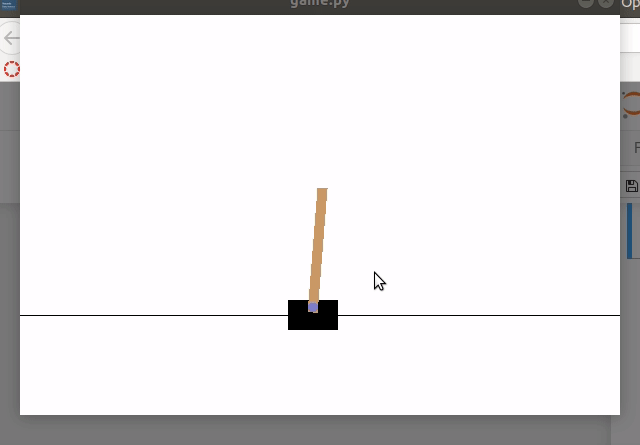

Trained agent
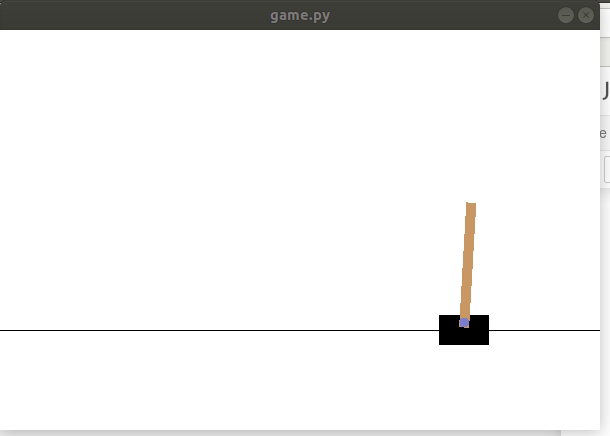

# Solving Lunar Lander

Now we will attempt to solve the [Lunar Lander](https://gym.openai.com/envs/LunarLander-v2/) problem using DQNs similar to what was done for the CartPole problem. First let's try the same simple DQN that was used above. To save time I will load the weights from a model that was already trained over 200 episodes and test the result.

## DQN

In [1]:
%run game.py -g LunarLander-v2 -m dqn -r True -tm ./LunarLander-v2_dqn_final/LunarLander-v2_dqn_200.h5

Using TensorFlow backend.


Episode: 0/99, Score: 233.9527913090054, Average Score: 233.95, Steps: 383, Total Steps: 383
Episode: 1/99, Score: -496.5420333441653, Average Score: -131.29, Steps: 681, Total Steps: 1064
Episode: 2/99, Score: -470.4700491573852, Average Score: -244.35, Steps: 628, Total Steps: 1692
Episode: 3/99, Score: -724.2575469271703, Average Score: -364.33, Steps: 1000, Total Steps: 2692
Episode: 4/99, Score: -253.31841019173842, Average Score: -342.13, Steps: 245, Total Steps: 2937
Episode: 5/99, Score: -450.473717758378, Average Score: -360.18, Steps: 490, Total Steps: 3427
Episode: 6/99, Score: -488.90900129441843, Average Score: -378.57, Steps: 844, Total Steps: 4271
Episode: 7/99, Score: -189.72044489939066, Average Score: -354.97, Steps: 281, Total Steps: 4552
Episode: 8/99, Score: -702.7919061164807, Average Score: -393.61, Steps: 915, Total Steps: 5467
Episode: 9/99, Score: -614.6411130889668, Average Score: -415.72, Steps: 1000, Total Steps: 6467
Episode: 10/99, Score: -400.56710414199

Episode: 84/99, Score: -483.7736643968539, Average Score: -382.24, Steps: 660, Total Steps: 56672
Episode: 85/99, Score: -464.5227395370779, Average Score: -383.20, Steps: 904, Total Steps: 57576
Episode: 86/99, Score: -558.0406262329623, Average Score: -385.21, Steps: 803, Total Steps: 58379
Episode: 87/99, Score: -726.3890043371189, Average Score: -389.09, Steps: 1000, Total Steps: 59379
Episode: 88/99, Score: -469.28351785715824, Average Score: -389.99, Steps: 687, Total Steps: 60066
Episode: 89/99, Score: -420.39514087044205, Average Score: -390.32, Steps: 791, Total Steps: 60857
Episode: 90/99, Score: -704.9506276424509, Average Score: -393.78, Steps: 974, Total Steps: 61831
Episode: 91/99, Score: -28.625939717277348, Average Score: -389.81, Steps: 300, Total Steps: 62131
Episode: 92/99, Score: -536.5931041594291, Average Score: -391.39, Steps: 1000, Total Steps: 63131
Episode: 93/99, Score: 20.458912251504458, Average Score: -387.01, Steps: 317, Total Steps: 63448
Episode: 94/99,

The results aren't great with an average score over 100 episodes of -391.04. You can see though that the agent does successfully land the lander (score over 200 is a good indicator) on some of the episodes so there has been some learning. The agent tends to try and maintain flight and go off the top of the screen often when it doesn't attempt to land. You can see some of its attempts in the gif below.

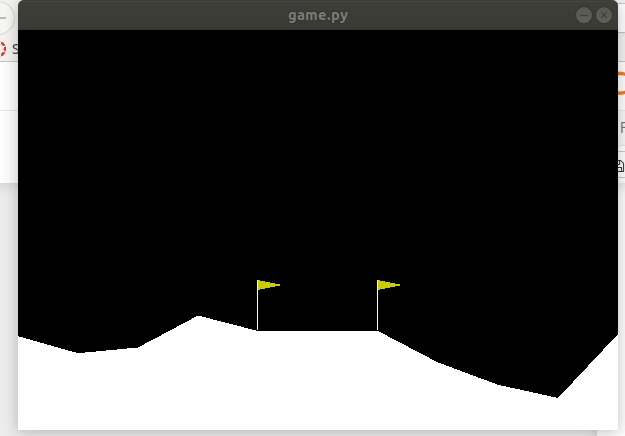

## DDQN

In an attempt to improve the results above I created another agent that uses a double Q-learning network architecture. In this architecture the DQN is used to predict an action take at each step but a separate target network is used to evaluate that prediction. This helps reduce overestimation of q values and generally leads to more stable training.  
Again, I will use weights from a model that was previously trained over 2500 episodes and evaluate its performance over 100 episodes.

In [1]:
%run game.py -g LunarLander-v2 -m ddqn -r True -tm ./LunarLander-v2_ddqn_final/LunarLander-v2_ddqn_2500.h5

Using TensorFlow backend.


Episode: 0/99, Score: -33.969642145474324, Average Score: -33.97, Steps: 123, Total Steps: 123
Episode: 1/99, Score: -194.54241870274495, Average Score: -114.26, Steps: 868, Total Steps: 991
Episode: 2/99, Score: -32.0513087222121, Average Score: -86.85, Steps: 118, Total Steps: 1109
Episode: 3/99, Score: -154.31563710292923, Average Score: -103.72, Steps: 231, Total Steps: 1340
Episode: 4/99, Score: -147.7111370488457, Average Score: -112.52, Steps: 454, Total Steps: 1794
Episode: 5/99, Score: 4.221656617953471, Average Score: -93.06, Steps: 118, Total Steps: 1912
Episode: 6/99, Score: -10.484529920924984, Average Score: -81.26, Steps: 119, Total Steps: 2031
Episode: 7/99, Score: -29.385795525834766, Average Score: -74.78, Steps: 135, Total Steps: 2166
Episode: 8/99, Score: -70.86270152244398, Average Score: -74.34, Steps: 1000, Total Steps: 3166
Episode: 9/99, Score: -9.631235141397454, Average Score: -67.87, Steps: 210, Total Steps: 3376
Episode: 10/99, Score: -174.19710271726032, A

Episode: 85/99, Score: 206.1557623729422, Average Score: -44.75, Steps: 289, Total Steps: 36169
Episode: 86/99, Score: 106.33204761006822, Average Score: -43.01, Steps: 734, Total Steps: 36903
Episode: 87/99, Score: 25.496428210055086, Average Score: -42.23, Steps: 891, Total Steps: 37794
Episode: 88/99, Score: 193.46428172397557, Average Score: -39.58, Steps: 410, Total Steps: 38204
Episode: 89/99, Score: -100.92912941230645, Average Score: -40.27, Steps: 307, Total Steps: 38511
Episode: 90/99, Score: 97.7549355047172, Average Score: -38.75, Steps: 772, Total Steps: 39283
Episode: 91/99, Score: -50.91713199032486, Average Score: -38.88, Steps: 109, Total Steps: 39392
Episode: 92/99, Score: -94.68751421059079, Average Score: -39.48, Steps: 1000, Total Steps: 40392
Episode: 93/99, Score: -157.4725296303842, Average Score: -40.74, Steps: 303, Total Steps: 40695
Episode: 94/99, Score: -38.213323616975515, Average Score: -40.71, Steps: 123, Total Steps: 40818
Episode: 95/99, Score: -31.133

It performs better than the DQN with an average score of -41.05 but still results in a negative average. The agent no longer seems to have the issue of flying off the top and now seems to struggle to know when to stop firing its engines after landing as well as landing off center.

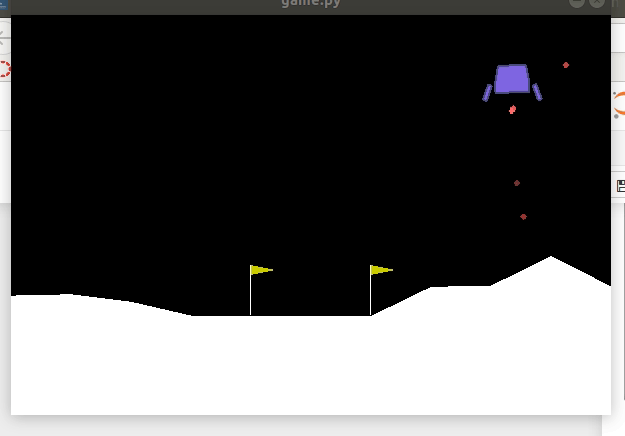

## Dueling DDQN

A dueling DQN separates the Q value into the sum of two new values, the value of being at that state and the advantage of taking that action at that state. By separating these two within the network it allows our model to learn which states are valuable without needing to learn the effect of each action at each state. As before we will test an example of a dueling DQN that was trained for over 1000 episodes.

In [1]:
%run game.py -g LunarLander-v2 -m duelingddqn -r True -tm ./LunarLander-v2_duelingddqn_final/LunarLander-v2_duelingddqn_final.h5

Using TensorFlow backend.


Episode: 0/99, Score: -195.54134147065872, Average Score: -195.54, Steps: 969, Total Steps: 969
Episode: 1/99, Score: -96.39995779257535, Average Score: -145.97, Steps: 209, Total Steps: 1178
Episode: 2/99, Score: -85.58068660966372, Average Score: -125.84, Steps: 193, Total Steps: 1371
Episode: 3/99, Score: -118.84021634476544, Average Score: -124.09, Steps: 1000, Total Steps: 2371
Episode: 4/99, Score: -114.21308623755863, Average Score: -122.12, Steps: 321, Total Steps: 2692
Episode: 5/99, Score: -48.027798690750174, Average Score: -109.77, Steps: 193, Total Steps: 2885
Episode: 6/99, Score: -135.17594668080565, Average Score: -113.40, Steps: 1000, Total Steps: 3885
Episode: 7/99, Score: -88.94545537659766, Average Score: -110.34, Steps: 206, Total Steps: 4091
Episode: 8/99, Score: -90.88911394240927, Average Score: -108.18, Steps: 1000, Total Steps: 5091
Episode: 9/99, Score: -135.17729504432555, Average Score: -110.88, Steps: 1000, Total Steps: 6091
Episode: 10/99, Score: -156.053

Episode: 84/99, Score: -204.99047805142004, Average Score: -113.11, Steps: 864, Total Steps: 54664
Episode: 85/99, Score: -76.63898681625021, Average Score: -112.69, Steps: 203, Total Steps: 54867
Episode: 86/99, Score: -201.64145472191404, Average Score: -113.71, Steps: 729, Total Steps: 55596
Episode: 87/99, Score: -251.49557648936081, Average Score: -115.27, Steps: 990, Total Steps: 56586
Episode: 88/99, Score: -66.37037081124642, Average Score: -114.73, Steps: 1000, Total Steps: 57586
Episode: 89/99, Score: -109.13554096148404, Average Score: -114.66, Steps: 1000, Total Steps: 58586
Episode: 90/99, Score: -144.58333479272983, Average Score: -114.99, Steps: 563, Total Steps: 59149
Episode: 91/99, Score: -166.86755833530364, Average Score: -115.56, Steps: 744, Total Steps: 59893
Episode: 92/99, Score: -44.13097775076419, Average Score: -114.79, Steps: 1000, Total Steps: 60893
Episode: 93/99, Score: -70.13941817285259, Average Score: -114.31, Steps: 153, Total Steps: 61046
Episode: 94

Unfortunately, it performs even worse than the double DQN with an average score of -114.79. In the gif below you can see that it has seemingly learned to fly but rarely if ever lands.

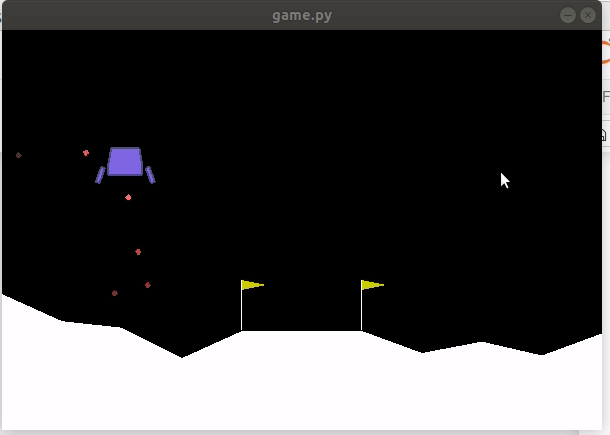

## DDQN with Prioritized Experience Replay

The final test was to try and use prioritized experience replay with the double Q-learning network. Prioritized experience replay is a way to improve the sampling from memory during replay by prioritizing rich but rare experiences. Below is a test of a model with PER that was trained for over 400 episodes.

In [1]:
%run game.py -g LunarLander-v2 -m perddqn -r True -tm ./LunarLander-v2_perddqn_final/LunarLander-v2_perddqn_final.h5

Using TensorFlow backend.


Episode: 0/99, Score: -170.18787605226012, Average Score: -170.19, Steps: 1000, Total Steps: 1000
Episode: 1/99, Score: -366.52469319639795, Average Score: -268.36, Steps: 652, Total Steps: 1652
Episode: 2/99, Score: -161.10384900550355, Average Score: -232.61, Steps: 1000, Total Steps: 2652
Episode: 3/99, Score: -186.24351734672572, Average Score: -221.01, Steps: 101, Total Steps: 2753
Episode: 4/99, Score: -140.9214057550677, Average Score: -205.00, Steps: 1000, Total Steps: 3753
Episode: 5/99, Score: -167.0688882042826, Average Score: -198.68, Steps: 66, Total Steps: 3819
Episode: 6/99, Score: -150.15718459412412, Average Score: -191.74, Steps: 1000, Total Steps: 4819
Episode: 7/99, Score: -177.6460753824164, Average Score: -189.98, Steps: 1000, Total Steps: 5819
Episode: 8/99, Score: -299.7568297247736, Average Score: -202.18, Steps: 629, Total Steps: 6448
Episode: 9/99, Score: 42.568618716173944, Average Score: -177.70, Steps: 79, Total Steps: 6527
Episode: 10/99, Score: -131.0115

Episode: 83/99, Score: -327.3680836520621, Average Score: -229.27, Steps: 1000, Total Steps: 71172
Episode: 84/99, Score: -314.24780057693533, Average Score: -230.27, Steps: 1000, Total Steps: 72172
Episode: 85/99, Score: -172.86318752362246, Average Score: -229.60, Steps: 1000, Total Steps: 73172
Episode: 86/99, Score: -129.91948082568413, Average Score: -228.46, Steps: 71, Total Steps: 73243
Episode: 87/99, Score: -390.06233546424284, Average Score: -230.29, Steps: 805, Total Steps: 74048
Episode: 88/99, Score: -162.04712815409488, Average Score: -229.53, Steps: 1000, Total Steps: 75048
Episode: 89/99, Score: -305.97407678838425, Average Score: -230.38, Steps: 1000, Total Steps: 76048
Episode: 90/99, Score: -365.77190856125935, Average Score: -231.86, Steps: 703, Total Steps: 76751
Episode: 91/99, Score: -245.91890699556916, Average Score: -232.02, Steps: 317, Total Steps: 77068
Episode: 92/99, Score: -294.82884737148436, Average Score: -232.69, Steps: 367, Total Steps: 77435
Episode

This agent did not perform very well with an average score of -233.67. Similarly to the previous test you can see that in the gif below the agent can hover fairly well but can almost never land.

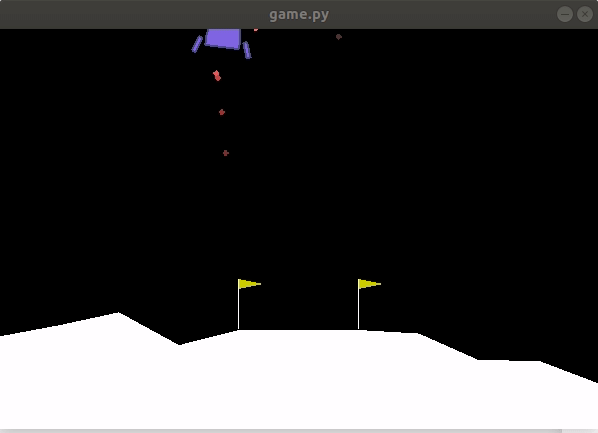

## Seeking improvement

Obviously the results seen above aren't great and I wanted to see if I could get a working agent that could "solve" the lunar lander problem with the time I had. So I decided to experiment with tweaking parameters. A few of those example training runs can be seen below.

In [3]:
%run game.py -g LunarLander-v2 -m test -r True -ts 200 -bs 64 -el 2000

Episode: 0/2000, Score: -280.53378993749914, Average Score: -280.53, Steps: 96, Total Steps: 96
Saving model to LunarLander-v2_test/LunarLander-v2_test_0.h5
Episode: 1/2000, Score: -392.13238015323196, Average Score: -336.33, Steps: 117, Total Steps: 213
Episode: 2/2000, Score: -89.98618613360615, Average Score: -254.22, Steps: 109, Total Steps: 322
Episode: 3/2000, Score: -229.658542752534, Average Score: -248.08, Steps: 89, Total Steps: 411
Episode: 4/2000, Score: -195.91142067568822, Average Score: -237.64, Steps: 90, Total Steps: 501
Episode: 5/2000, Score: -137.8917421637921, Average Score: -221.02, Steps: 128, Total Steps: 629
Episode: 6/2000, Score: -145.8045565642525, Average Score: -210.27, Steps: 83, Total Steps: 712
Episode: 7/2000, Score: -80.07518152339652, Average Score: -194.00, Steps: 96, Total Steps: 808
Episode: 8/2000, Score: -330.30382782694227, Average Score: -209.14, Steps: 102, Total Steps: 910
Episode: 9/2000, Score: -177.4794709665442, Average Score: -205.98, S

Episode: 83/2000, Score: -143.3276721137198, Average Score: -184.38, Steps: 107, Total Steps: 9200
Episode: 84/2000, Score: -345.3429370817795, Average Score: -186.27, Steps: 111, Total Steps: 9311
Episode: 85/2000, Score: -91.52804751047609, Average Score: -185.17, Steps: 67, Total Steps: 9378
Episode: 86/2000, Score: -76.9657127420652, Average Score: -183.93, Steps: 94, Total Steps: 9472
Episode: 87/2000, Score: -99.71784896755288, Average Score: -182.97, Steps: 87, Total Steps: 9559
Episode: 88/2000, Score: -115.61737302396263, Average Score: -182.21, Steps: 86, Total Steps: 9645
Episode: 89/2000, Score: -126.4475560490782, Average Score: -181.59, Steps: 104, Total Steps: 9749
Episode: 90/2000, Score: -67.58674956919155, Average Score: -180.34, Steps: 76, Total Steps: 9825
Episode: 91/2000, Score: -134.70038399073437, Average Score: -179.85, Steps: 85, Total Steps: 9910
Episode: 92/2000, Score: -105.40458351678971, Average Score: -179.04, Steps: 63, Total Steps: 9973
Episode: 93/200

Episode: 164/2000, Score: -96.02928937246962, Average Score: -167.84, Steps: 74, Total Steps: 16991
Episode: 165/2000, Score: -82.80784395689192, Average Score: -165.26, Steps: 133, Total Steps: 17124
Episode: 166/2000, Score: -131.64100075320735, Average Score: -165.12, Steps: 77, Total Steps: 17201
Episode: 167/2000, Score: -95.45086972878056, Average Score: -163.00, Steps: 121, Total Steps: 17322
Episode: 168/2000, Score: -280.325334464252, Average Score: -164.35, Steps: 101, Total Steps: 17423
Episode: 169/2000, Score: -105.93937008015695, Average Score: -164.63, Steps: 90, Total Steps: 17513
Episode: 170/2000, Score: -143.57967978693995, Average Score: -164.47, Steps: 84, Total Steps: 17597
Episode: 171/2000, Score: -67.27106722170132, Average Score: -163.27, Steps: 80, Total Steps: 17677
Episode: 172/2000, Score: -229.16305473144556, Average Score: -163.98, Steps: 131, Total Steps: 17808
Episode: 173/2000, Score: -167.32756348532564, Average Score: -164.03, Steps: 78, Total Steps

Episode: 245/2000, Score: -164.7433200463031, Average Score: -160.27, Steps: 68, Total Steps: 24990
Episode: 246/2000, Score: -72.24596288684255, Average Score: -158.25, Steps: 67, Total Steps: 25057
Episode: 247/2000, Score: -84.22930015212793, Average Score: -157.60, Steps: 98, Total Steps: 25155
Episode: 248/2000, Score: -246.16415755355877, Average Score: -158.24, Steps: 106, Total Steps: 25261
Episode: 249/2000, Score: -132.29074187037145, Average Score: -159.37, Steps: 101, Total Steps: 25362
Episode: 250/2000, Score: -185.40738726769027, Average Score: -159.59, Steps: 109, Total Steps: 25471
Episode: 251/2000, Score: -138.3951038363893, Average Score: -159.33, Steps: 114, Total Steps: 25585
Episode: 252/2000, Score: -90.07851518940585, Average Score: -157.33, Steps: 103, Total Steps: 25688
Episode: 253/2000, Score: -134.1805877585017, Average Score: -157.25, Steps: 105, Total Steps: 25793
Episode: 254/2000, Score: -290.40965537760303, Average Score: -159.29, Steps: 84, Total Ste

Episode: 326/2000, Score: -130.18894847452475, Average Score: -141.04, Steps: 100, Total Steps: 33092
Episode: 327/2000, Score: -133.4425515522808, Average Score: -140.16, Steps: 107, Total Steps: 33199
Episode: 328/2000, Score: -104.01285614785168, Average Score: -140.06, Steps: 101, Total Steps: 33300
Episode: 329/2000, Score: -92.65577435529107, Average Score: -140.24, Steps: 86, Total Steps: 33386
Episode: 330/2000, Score: -223.04268608135618, Average Score: -140.94, Steps: 141, Total Steps: 33527
Episode: 331/2000, Score: -70.85361685795392, Average Score: -139.38, Steps: 114, Total Steps: 33641
Episode: 332/2000, Score: -29.52769136343109, Average Score: -137.52, Steps: 127, Total Steps: 33768
Episode: 333/2000, Score: -76.96423138812445, Average Score: -135.75, Steps: 92, Total Steps: 33860
Episode: 334/2000, Score: -96.94576196481552, Average Score: -136.69, Steps: 69, Total Steps: 33929
Episode: 335/2000, Score: -224.07867468623806, Average Score: -135.77, Steps: 169, Total St

Episode: 407/2000, Score: -48.98473501501293, Average Score: -124.02, Steps: 83, Total Steps: 42515
Episode: 408/2000, Score: -70.91482587158706, Average Score: -122.59, Steps: 141, Total Steps: 42656
Episode: 409/2000, Score: -30.969263777704526, Average Score: -122.43, Steps: 124, Total Steps: 42780
Episode: 410/2000, Score: -146.11063851198543, Average Score: -122.54, Steps: 103, Total Steps: 42883
Episode: 411/2000, Score: -297.26433185359616, Average Score: -123.88, Steps: 118, Total Steps: 43001
Episode: 412/2000, Score: -196.59747776461, Average Score: -125.22, Steps: 146, Total Steps: 43147
Episode: 413/2000, Score: -196.56092744573854, Average Score: -125.69, Steps: 120, Total Steps: 43267
Episode: 414/2000, Score: -94.62134365686293, Average Score: -126.18, Steps: 117, Total Steps: 43384
Episode: 415/2000, Score: -64.13023087220272, Average Score: -125.99, Steps: 73, Total Steps: 43457
Episode: 416/2000, Score: -67.26309734697139, Average Score: -125.58, Steps: 160, Total Ste

Episode: 489/2000, Score: -171.28870866486426, Average Score: -126.46, Steps: 95, Total Steps: 52476
Episode: 490/2000, Score: -106.80358074823008, Average Score: -125.45, Steps: 140, Total Steps: 52616
Episode: 491/2000, Score: -84.95101131981784, Average Score: -125.40, Steps: 134, Total Steps: 52750
Episode: 492/2000, Score: -134.43588582896535, Average Score: -124.87, Steps: 75, Total Steps: 52825
Episode: 493/2000, Score: -74.37791223110602, Average Score: -124.27, Steps: 84, Total Steps: 52909
Episode: 494/2000, Score: -327.8321900492999, Average Score: -127.39, Steps: 138, Total Steps: 53047
Episode: 495/2000, Score: -118.24441220472298, Average Score: -127.74, Steps: 136, Total Steps: 53183
Episode: 496/2000, Score: -64.47064404544237, Average Score: -127.23, Steps: 145, Total Steps: 53328
Episode: 497/2000, Score: -34.460617032780235, Average Score: -126.97, Steps: 138, Total Steps: 53466
Episode: 498/2000, Score: -155.5273888142507, Average Score: -127.49, Steps: 149, Total S

Episode: 570/2000, Score: -68.76559037410337, Average Score: -116.21, Steps: 104, Total Steps: 61762
Episode: 571/2000, Score: -333.350823511371, Average Score: -118.64, Steps: 144, Total Steps: 61906
Episode: 572/2000, Score: -135.98484274260883, Average Score: -118.78, Steps: 112, Total Steps: 62018
Episode: 573/2000, Score: -62.550467143003004, Average Score: -117.05, Steps: 109, Total Steps: 62127
Episode: 574/2000, Score: -180.7053152351687, Average Score: -118.86, Steps: 132, Total Steps: 62259
Episode: 575/2000, Score: -99.2184468616959, Average Score: -118.77, Steps: 126, Total Steps: 62385
Episode: 576/2000, Score: -68.96730001992853, Average Score: -116.74, Steps: 163, Total Steps: 62548
Episode: 577/2000, Score: -71.9388928829164, Average Score: -116.07, Steps: 117, Total Steps: 62665
Episode: 578/2000, Score: -139.29936673283248, Average Score: -116.51, Steps: 87, Total Steps: 62752
Episode: 579/2000, Score: -126.6443834445902, Average Score: -116.28, Steps: 129, Total Step

Episode: 651/2000, Score: -99.10567033208369, Average Score: -106.22, Steps: 77, Total Steps: 71645
Episode: 652/2000, Score: -80.73540686443818, Average Score: -104.73, Steps: 87, Total Steps: 71732
Episode: 653/2000, Score: -72.4381132401063, Average Score: -101.33, Steps: 76, Total Steps: 71808
Episode: 654/2000, Score: -265.48432788651735, Average Score: -103.37, Steps: 117, Total Steps: 71925
Episode: 655/2000, Score: -313.1918360174702, Average Score: -105.46, Steps: 202, Total Steps: 72127
Episode: 656/2000, Score: -1.182305561113239, Average Score: -104.87, Steps: 135, Total Steps: 72262
Episode: 657/2000, Score: -161.98362626831488, Average Score: -105.34, Steps: 144, Total Steps: 72406
Episode: 658/2000, Score: -23.401067192651553, Average Score: -104.31, Steps: 160, Total Steps: 72566
Episode: 659/2000, Score: 76.58836913655819, Average Score: -103.60, Steps: 1000, Total Steps: 73566
Episode: 660/2000, Score: -78.18916288324417, Average Score: -103.97, Steps: 147, Total Step

Episode: 733/2000, Score: -75.33118827583118, Average Score: -85.24, Steps: 137, Total Steps: 84748
Episode: 734/2000, Score: -88.6403028546387, Average Score: -85.14, Steps: 97, Total Steps: 84845
Episode: 735/2000, Score: 5.500685029445833, Average Score: -83.88, Steps: 164, Total Steps: 85009
Episode: 736/2000, Score: -25.990733133462953, Average Score: -82.25, Steps: 175, Total Steps: 85184
Episode: 737/2000, Score: -104.10139847811787, Average Score: -82.35, Steps: 129, Total Steps: 85313
Episode: 738/2000, Score: -110.15496475715759, Average Score: -83.09, Steps: 109, Total Steps: 85422
Episode: 739/2000, Score: -91.13740439688235, Average Score: -83.21, Steps: 128, Total Steps: 85550
Episode: 740/2000, Score: -75.67107732091279, Average Score: -83.53, Steps: 104, Total Steps: 85654
Episode: 741/2000, Score: -30.757759833870182, Average Score: -83.82, Steps: 166, Total Steps: 85820
Episode: 742/2000, Score: -16.23304023164654, Average Score: -83.15, Steps: 160, Total Steps: 85980

Episode: 815/2000, Score: -52.646487470289614, Average Score: -76.74, Steps: 78, Total Steps: 98833
Episode: 816/2000, Score: -111.10721128262759, Average Score: -76.95, Steps: 159, Total Steps: 98992
Episode: 817/2000, Score: -118.30561006858885, Average Score: -77.59, Steps: 119, Total Steps: 99111
Episode: 818/2000, Score: 5.285703404443083, Average Score: -76.86, Steps: 99, Total Steps: 99210
Episode: 819/2000, Score: -119.68352749867583, Average Score: -76.62, Steps: 173, Total Steps: 99383
Episode: 820/2000, Score: -72.82119167205781, Average Score: -74.13, Steps: 180, Total Steps: 99563
Episode: 821/2000, Score: -57.8064618478491, Average Score: -73.15, Steps: 79, Total Steps: 99642
Episode: 822/2000, Score: -36.488324658600234, Average Score: -72.11, Steps: 149, Total Steps: 99791
Episode: 823/2000, Score: -16.50845965420629, Average Score: -72.75, Steps: 166, Total Steps: 99957
Episode: 824/2000, Score: -60.13376209761605, Average Score: -72.09, Steps: 112, Total Steps: 100069

Episode: 897/2000, Score: -60.97449845869058, Average Score: -74.03, Steps: 79, Total Steps: 114451
Episode: 898/2000, Score: -14.90423150929999, Average Score: -73.16, Steps: 143, Total Steps: 114594
Episode: 899/2000, Score: -51.17454815681238, Average Score: -74.08, Steps: 184, Total Steps: 114778
Episode: 900/2000, Score: -124.04250721552962, Average Score: -75.05, Steps: 195, Total Steps: 114973
Saving model to LunarLander-v2_test/LunarLander-v2_test_900.h5
Episode: 901/2000, Score: 7.299907397407488, Average Score: -73.77, Steps: 1000, Total Steps: 115973
Episode: 902/2000, Score: -262.43521990969305, Average Score: -76.44, Steps: 129, Total Steps: 116102
Episode: 903/2000, Score: -108.4700906101553, Average Score: -77.13, Steps: 274, Total Steps: 116376
Episode: 904/2000, Score: -307.66944961741194, Average Score: -79.85, Steps: 503, Total Steps: 116879
Episode: 905/2000, Score: -31.915016949142114, Average Score: -79.82, Steps: 150, Total Steps: 117029
Episode: 906/2000, Score:

Episode: 978/2000, Score: 0.8998272810044057, Average Score: -73.76, Steps: 367, Total Steps: 135920
Episode: 979/2000, Score: 9.63445733562574, Average Score: -73.43, Steps: 137, Total Steps: 136057
Episode: 980/2000, Score: -39.57519173767925, Average Score: -73.19, Steps: 153, Total Steps: 136210
Episode: 981/2000, Score: -169.3212044815691, Average Score: -73.74, Steps: 231, Total Steps: 136441
Episode: 982/2000, Score: -16.816453683888255, Average Score: -73.47, Steps: 154, Total Steps: 136595
Episode: 983/2000, Score: -185.1835842670825, Average Score: -74.29, Steps: 406, Total Steps: 137001
Episode: 984/2000, Score: 16.196314044465723, Average Score: -72.89, Steps: 161, Total Steps: 137162
Episode: 985/2000, Score: -209.98258320821753, Average Score: -74.18, Steps: 326, Total Steps: 137488
Episode: 986/2000, Score: -309.35773481520437, Average Score: -76.89, Steps: 562, Total Steps: 138050
Episode: 987/2000, Score: -13.513957042558829, Average Score: -76.54, Steps: 232, Total St

Episode: 1058/2000, Score: -22.45462845341578, Average Score: -79.53, Steps: 144, Total Steps: 165988
Episode: 1059/2000, Score: -70.5926524734965, Average Score: -79.77, Steps: 1000, Total Steps: 166988
Episode: 1060/2000, Score: -54.96633368603656, Average Score: -79.91, Steps: 139, Total Steps: 167127
Episode: 1061/2000, Score: -140.3572752712446, Average Score: -81.95, Steps: 469, Total Steps: 167596
Episode: 1062/2000, Score: -7.8499283937579065, Average Score: -81.80, Steps: 143, Total Steps: 167739
Episode: 1063/2000, Score: 27.8149990422138, Average Score: -78.76, Steps: 118, Total Steps: 167857
Episode: 1064/2000, Score: -60.624486306856106, Average Score: -79.65, Steps: 145, Total Steps: 168002
Episode: 1065/2000, Score: -176.4452309321501, Average Score: -80.93, Steps: 150, Total Steps: 168152
Episode: 1066/2000, Score: -24.198597081409126, Average Score: -79.51, Steps: 1000, Total Steps: 169152
Episode: 1067/2000, Score: -79.48526183274318, Average Score: -80.45, Steps: 677

Episode: 1138/2000, Score: -191.26102275064824, Average Score: -86.27, Steps: 596, Total Steps: 215534
Episode: 1139/2000, Score: -222.78069178885835, Average Score: -88.15, Steps: 431, Total Steps: 215965
Episode: 1140/2000, Score: -66.41313355002855, Average Score: -87.42, Steps: 1000, Total Steps: 216965
Episode: 1141/2000, Score: -99.28551808380647, Average Score: -87.69, Steps: 1000, Total Steps: 217965
Episode: 1142/2000, Score: -89.17899050469526, Average Score: -85.71, Steps: 587, Total Steps: 218552
Saving model to LunarLander-v2_test/LunarLander-v2_test_final.h5
Saving training history to csv LunarLander-v2_test/LunarLander-v2_test_history.csv
Killing game


In [4]:
%run game.py -g LunarLander-v2 -m test -ts 200 -bs 64 -el 2000

Episode: 0/2000, Score: -317.271743722371, Average Score: -317.27, Steps: 78, Total Steps: 78
Saving model to LunarLander-v2_test/LunarLander-v2_test_0.h5
Episode: 1/2000, Score: -227.19209778876728, Average Score: -272.23, Steps: 102, Total Steps: 180
Episode: 2/2000, Score: -295.00531742516864, Average Score: -279.82, Steps: 67, Total Steps: 247
Episode: 3/2000, Score: -117.0545845682819, Average Score: -239.13, Steps: 87, Total Steps: 334
Episode: 4/2000, Score: -380.18036423105605, Average Score: -267.34, Steps: 102, Total Steps: 436
Episode: 5/2000, Score: -110.95556229735807, Average Score: -241.28, Steps: 80, Total Steps: 516
Episode: 6/2000, Score: -294.1611932930157, Average Score: -248.83, Steps: 84, Total Steps: 600
Episode: 7/2000, Score: -223.41358317950233, Average Score: -245.65, Steps: 124, Total Steps: 724
Episode: 8/2000, Score: -79.96270990908324, Average Score: -227.24, Steps: 67, Total Steps: 791
Episode: 9/2000, Score: -175.8619139215203, Average Score: -222.11, S

Episode: 83/2000, Score: -73.69383386220903, Average Score: -178.72, Steps: 69, Total Steps: 7522
Episode: 84/2000, Score: -126.30174506374854, Average Score: -178.11, Steps: 177, Total Steps: 7699
Episode: 85/2000, Score: -249.01175621155684, Average Score: -178.93, Steps: 107, Total Steps: 7806
Episode: 86/2000, Score: -150.84748567614133, Average Score: -178.61, Steps: 68, Total Steps: 7874
Episode: 87/2000, Score: -364.59061704511174, Average Score: -180.72, Steps: 97, Total Steps: 7971
Episode: 88/2000, Score: -141.35483927221537, Average Score: -180.28, Steps: 122, Total Steps: 8093
Episode: 89/2000, Score: -181.12064797456162, Average Score: -180.29, Steps: 68, Total Steps: 8161
Episode: 90/2000, Score: -395.8787089083899, Average Score: -182.66, Steps: 103, Total Steps: 8264
Episode: 91/2000, Score: -130.64061149201748, Average Score: -182.09, Steps: 69, Total Steps: 8333
Episode: 92/2000, Score: -102.64913658392904, Average Score: -181.24, Steps: 100, Total Steps: 8433
Episode

Episode: 165/2000, Score: -128.20783153878068, Average Score: -177.86, Steps: 82, Total Steps: 15457
Episode: 166/2000, Score: -123.57374000657055, Average Score: -177.58, Steps: 79, Total Steps: 15536
Episode: 167/2000, Score: -101.06352441282726, Average Score: -177.93, Steps: 90, Total Steps: 15626
Episode: 168/2000, Score: -24.381076305590568, Average Score: -176.32, Steps: 135, Total Steps: 15761
Episode: 169/2000, Score: -144.82186137282457, Average Score: -176.25, Steps: 116, Total Steps: 15877
Episode: 170/2000, Score: -152.34038527210205, Average Score: -176.52, Steps: 69, Total Steps: 15946
Episode: 171/2000, Score: -171.58244713923742, Average Score: -175.82, Steps: 65, Total Steps: 16011
Episode: 172/2000, Score: -48.283585461767316, Average Score: -174.54, Steps: 71, Total Steps: 16082
Episode: 173/2000, Score: -108.84748057969472, Average Score: -172.14, Steps: 85, Total Steps: 16167
Episode: 174/2000, Score: -222.0758630770766, Average Score: -170.03, Steps: 103, Total S

Episode: 246/2000, Score: -65.68629949933472, Average Score: -140.57, Steps: 79, Total Steps: 23377
Episode: 247/2000, Score: -115.35926865614294, Average Score: -140.53, Steps: 124, Total Steps: 23501
Episode: 248/2000, Score: -92.38333794827537, Average Score: -140.64, Steps: 113, Total Steps: 23614
Episode: 249/2000, Score: -96.51896690414466, Average Score: -138.35, Steps: 68, Total Steps: 23682
Episode: 250/2000, Score: -169.00340698983268, Average Score: -138.99, Steps: 121, Total Steps: 23803
Episode: 251/2000, Score: -308.84120495193656, Average Score: -141.06, Steps: 93, Total Steps: 23896
Episode: 252/2000, Score: -110.88128138441829, Average Score: -141.12, Steps: 86, Total Steps: 23982
Episode: 253/2000, Score: -31.085544808567363, Average Score: -140.67, Steps: 76, Total Steps: 24058
Episode: 254/2000, Score: -168.3735540278471, Average Score: -139.05, Steps: 105, Total Steps: 24163
Episode: 255/2000, Score: -158.84273339542602, Average Score: -138.45, Steps: 94, Total Ste

Episode: 327/2000, Score: -106.81121016036663, Average Score: -144.95, Steps: 85, Total Steps: 31542
Episode: 328/2000, Score: -148.85209771683537, Average Score: -145.48, Steps: 134, Total Steps: 31676
Episode: 329/2000, Score: -47.39878511930977, Average Score: -145.32, Steps: 135, Total Steps: 31811
Episode: 330/2000, Score: -92.33557476472399, Average Score: -146.22, Steps: 149, Total Steps: 31960
Episode: 331/2000, Score: -214.53255976839938, Average Score: -146.54, Steps: 142, Total Steps: 32102
Episode: 332/2000, Score: -34.27789307355587, Average Score: -146.35, Steps: 185, Total Steps: 32287
Episode: 333/2000, Score: -98.92009649372848, Average Score: -145.59, Steps: 72, Total Steps: 32359
Episode: 334/2000, Score: -60.1341636580008, Average Score: -145.09, Steps: 104, Total Steps: 32463
Episode: 335/2000, Score: -127.89167637655204, Average Score: -145.88, Steps: 164, Total Steps: 32627
Episode: 336/2000, Score: -89.62398077182075, Average Score: -145.78, Steps: 106, Total St

Episode: 408/2000, Score: -104.8482447992653, Average Score: -123.86, Steps: 85, Total Steps: 40685
Episode: 409/2000, Score: -118.21511609620183, Average Score: -123.89, Steps: 141, Total Steps: 40826
Episode: 410/2000, Score: -86.63226422555024, Average Score: -124.77, Steps: 75, Total Steps: 40901
Episode: 411/2000, Score: -121.37135438240044, Average Score: -123.79, Steps: 112, Total Steps: 41013
Episode: 412/2000, Score: -11.590027768395473, Average Score: -121.52, Steps: 114, Total Steps: 41127
Episode: 413/2000, Score: -118.75315334459064, Average Score: -121.61, Steps: 117, Total Steps: 41244
Episode: 414/2000, Score: -64.77309194453214, Average Score: -120.29, Steps: 83, Total Steps: 41327
Episode: 415/2000, Score: -272.002709261316, Average Score: -122.65, Steps: 77, Total Steps: 41404
Episode: 416/2000, Score: -95.69600925328074, Average Score: -119.57, Steps: 78, Total Steps: 41482
Episode: 417/2000, Score: -145.56528454302008, Average Score: -119.47, Steps: 134, Total Step

Episode: 490/2000, Score: -284.8819016520762, Average Score: -110.37, Steps: 94, Total Steps: 49261
Episode: 491/2000, Score: -135.92550755867424, Average Score: -110.52, Steps: 83, Total Steps: 49344
Episode: 492/2000, Score: -115.35078632745295, Average Score: -110.86, Steps: 113, Total Steps: 49457
Episode: 493/2000, Score: -77.29811935644372, Average Score: -110.89, Steps: 91, Total Steps: 49548
Episode: 494/2000, Score: -107.5999136742526, Average Score: -111.29, Steps: 121, Total Steps: 49669
Episode: 495/2000, Score: -91.59701840493567, Average Score: -112.04, Steps: 78, Total Steps: 49747
Episode: 496/2000, Score: -80.39005715861117, Average Score: -111.72, Steps: 79, Total Steps: 49826
Episode: 497/2000, Score: -106.0135075153767, Average Score: -111.45, Steps: 69, Total Steps: 49895
Episode: 498/2000, Score: -85.42291819939688, Average Score: -111.04, Steps: 66, Total Steps: 49961
Episode: 499/2000, Score: -61.59670036350434, Average Score: -110.85, Steps: 125, Total Steps: 5

Episode: 571/2000, Score: -38.523775458241005, Average Score: -105.06, Steps: 184, Total Steps: 57836
Episode: 572/2000, Score: -102.35410965230155, Average Score: -105.60, Steps: 99, Total Steps: 57935
Episode: 573/2000, Score: -258.61508976203464, Average Score: -107.28, Steps: 69, Total Steps: 58004
Episode: 574/2000, Score: -94.74961083702944, Average Score: -107.72, Steps: 134, Total Steps: 58138
Episode: 575/2000, Score: -69.41744077880239, Average Score: -107.60, Steps: 83, Total Steps: 58221
Episode: 576/2000, Score: -28.95171232729163, Average Score: -106.95, Steps: 82, Total Steps: 58303
Episode: 577/2000, Score: -137.2604141482396, Average Score: -107.70, Steps: 100, Total Steps: 58403
Episode: 578/2000, Score: -109.92201504503322, Average Score: -105.10, Steps: 68, Total Steps: 58471
Episode: 579/2000, Score: -144.8102294902299, Average Score: -105.02, Steps: 129, Total Steps: 58600
Episode: 580/2000, Score: -59.09721470868914, Average Score: -104.90, Steps: 73, Total Steps

Episode: 652/2000, Score: -143.30172179350942, Average Score: -109.17, Steps: 116, Total Steps: 67715
Episode: 653/2000, Score: -71.78862999979592, Average Score: -108.12, Steps: 101, Total Steps: 67816
Episode: 654/2000, Score: -89.29675391520456, Average Score: -107.87, Steps: 138, Total Steps: 67954
Episode: 655/2000, Score: -40.02805434174854, Average Score: -107.42, Steps: 69, Total Steps: 68023
Episode: 656/2000, Score: -102.49090982437365, Average Score: -106.94, Steps: 116, Total Steps: 68139
Episode: 657/2000, Score: -33.94211800104148, Average Score: -107.29, Steps: 103, Total Steps: 68242
Episode: 658/2000, Score: -19.166167430659428, Average Score: -106.59, Steps: 86, Total Steps: 68328
Episode: 659/2000, Score: -50.25290438146208, Average Score: -106.28, Steps: 125, Total Steps: 68453
Episode: 660/2000, Score: -83.87661470799179, Average Score: -103.86, Steps: 107, Total Steps: 68560
Episode: 661/2000, Score: -131.53901347117218, Average Score: -103.98, Steps: 178, Total S

Episode: 733/2000, Score: -38.231943114985185, Average Score: -95.65, Steps: 193, Total Steps: 77307
Episode: 734/2000, Score: -38.00607988104315, Average Score: -95.65, Steps: 162, Total Steps: 77469
Episode: 735/2000, Score: -75.34098632465845, Average Score: -95.71, Steps: 113, Total Steps: 77582
Episode: 736/2000, Score: -50.38657327684724, Average Score: -95.90, Steps: 109, Total Steps: 77691
Episode: 737/2000, Score: -23.987091572742273, Average Score: -95.09, Steps: 128, Total Steps: 77819
Episode: 738/2000, Score: -142.84516081128464, Average Score: -95.59, Steps: 173, Total Steps: 77992
Episode: 739/2000, Score: -77.61697326476143, Average Score: -95.66, Steps: 121, Total Steps: 78113
Episode: 740/2000, Score: -92.09313377664104, Average Score: -95.19, Steps: 85, Total Steps: 78198
Episode: 741/2000, Score: -29.43425948281937, Average Score: -92.83, Steps: 81, Total Steps: 78279
Episode: 742/2000, Score: -89.87768161832543, Average Score: -94.01, Steps: 160, Total Steps: 78439

Episode: 815/2000, Score: -56.72861072943194, Average Score: -78.20, Steps: 141, Total Steps: 87523
Episode: 816/2000, Score: 0.5569487981076833, Average Score: -76.06, Steps: 81, Total Steps: 87604
Episode: 817/2000, Score: -57.36697446436219, Average Score: -75.96, Steps: 148, Total Steps: 87752
Episode: 818/2000, Score: -25.6061033230104, Average Score: -74.92, Steps: 227, Total Steps: 87979
Episode: 819/2000, Score: -129.1937699586678, Average Score: -74.98, Steps: 172, Total Steps: 88151
Episode: 820/2000, Score: -56.15139993219261, Average Score: -75.54, Steps: 92, Total Steps: 88243
Episode: 821/2000, Score: -65.02047369672854, Average Score: -75.16, Steps: 192, Total Steps: 88435
Episode: 822/2000, Score: -90.8604694681391, Average Score: -75.47, Steps: 116, Total Steps: 88551
Episode: 823/2000, Score: -55.949818553451195, Average Score: -74.95, Steps: 72, Total Steps: 88623
Episode: 824/2000, Score: -43.52263120857841, Average Score: -74.34, Steps: 75, Total Steps: 88698
Episo

Episode: 897/2000, Score: -64.12361948219097, Average Score: -62.90, Steps: 65, Total Steps: 98645
Episode: 898/2000, Score: -89.89093242283943, Average Score: -62.91, Steps: 114, Total Steps: 98759
Episode: 899/2000, Score: -121.86224833962466, Average Score: -63.37, Steps: 198, Total Steps: 98957
Episode: 900/2000, Score: -34.181221427392856, Average Score: -62.70, Steps: 130, Total Steps: 99087
Saving model to LunarLander-v2_test/LunarLander-v2_test_900.h5
Episode: 901/2000, Score: -67.274938443681, Average Score: -63.85, Steps: 147, Total Steps: 99234
Episode: 902/2000, Score: -51.91187387809424, Average Score: -64.04, Steps: 95, Total Steps: 99329
Episode: 903/2000, Score: -70.57275686078845, Average Score: -64.82, Steps: 97, Total Steps: 99426
Episode: 904/2000, Score: -21.513348332249947, Average Score: -63.32, Steps: 186, Total Steps: 99612
Episode: 905/2000, Score: 1.723762056181414, Average Score: -62.00, Steps: 119, Total Steps: 99731
Episode: 906/2000, Score: 14.20068228003

Episode: 978/2000, Score: -4.432816525895561, Average Score: -68.20, Steps: 100, Total Steps: 113365
Episode: 979/2000, Score: -8.617070133559636, Average Score: -67.54, Steps: 95, Total Steps: 113460
Episode: 980/2000, Score: -260.59806726266885, Average Score: -69.31, Steps: 126, Total Steps: 113586
Episode: 981/2000, Score: -0.32229362053799093, Average Score: -68.69, Steps: 140, Total Steps: 113726
Episode: 982/2000, Score: -44.31749068093052, Average Score: -68.57, Steps: 226, Total Steps: 113952
Episode: 983/2000, Score: -118.07642723164986, Average Score: -67.96, Steps: 116, Total Steps: 114068
Episode: 984/2000, Score: -14.0977690000027, Average Score: -67.53, Steps: 147, Total Steps: 114215
Episode: 985/2000, Score: -36.81408829545663, Average Score: -67.26, Steps: 91, Total Steps: 114306
Episode: 986/2000, Score: -43.7501967513993, Average Score: -67.24, Steps: 90, Total Steps: 114396
Episode: 987/2000, Score: -34.48370372673284, Average Score: -66.77, Steps: 334, Total Steps

Episode: 1058/2000, Score: -33.73522587312611, Average Score: -68.42, Steps: 88, Total Steps: 129505
Episode: 1059/2000, Score: -151.0606765783819, Average Score: -68.48, Steps: 375, Total Steps: 129880
Episode: 1060/2000, Score: -43.72738711954445, Average Score: -68.63, Steps: 123, Total Steps: 130003
Episode: 1061/2000, Score: -29.085938312879733, Average Score: -68.24, Steps: 277, Total Steps: 130280
Episode: 1062/2000, Score: 23.923707726727073, Average Score: -67.64, Steps: 248, Total Steps: 130528
Episode: 1063/2000, Score: -34.78974721311921, Average Score: -67.82, Steps: 127, Total Steps: 130655
Episode: 1064/2000, Score: -112.36410841275405, Average Score: -68.72, Steps: 244, Total Steps: 130899
Episode: 1065/2000, Score: -26.090845711294946, Average Score: -68.73, Steps: 113, Total Steps: 131012
Episode: 1066/2000, Score: -27.19742535764817, Average Score: -68.33, Steps: 299, Total Steps: 131311
Saving model to LunarLander-v2_test/LunarLander-v2_test_final.h5
Saving training

Eventually, I had a realization that using a memory of max length 1000000 might be hurting the agent. Since I wasn't even hitting 1000000 steps until over 2500 episodes anyway the agent wasn't "forgetting" about its early, poor runs until very late along. So I decided to test again with a memory size of only 100000 instead. The results can be seen below.

In [5]:
%run game.py -g LunarLander-v2 -m test -ts 200 -bs 64

Episode: 0/5000, Score: -315.61371913858267, Average Score: -315.61, Steps: 97, Total Steps: 97
Saving model to LunarLander-v2_test/LunarLander-v2_test_0.h5
Episode: 1/5000, Score: -441.3930084764613, Average Score: -378.50, Steps: 96, Total Steps: 193
Episode: 2/5000, Score: -201.49536198055475, Average Score: -319.50, Steps: 119, Total Steps: 312
Episode: 3/5000, Score: -98.03164747005492, Average Score: -264.13, Steps: 105, Total Steps: 417
Episode: 4/5000, Score: -215.09082161743225, Average Score: -254.32, Steps: 85, Total Steps: 502
Episode: 5/5000, Score: -24.818134808705466, Average Score: -216.07, Steps: 69, Total Steps: 571
Episode: 6/5000, Score: -177.37268823707535, Average Score: -210.55, Steps: 88, Total Steps: 659
Episode: 7/5000, Score: -113.89351989496313, Average Score: -198.46, Steps: 83, Total Steps: 742
Episode: 8/5000, Score: -102.68162506570967, Average Score: -187.82, Steps: 88, Total Steps: 830
Episode: 9/5000, Score: -122.66358842419953, Average Score: -181.31

Episode: 83/5000, Score: -338.3488004008176, Average Score: -184.52, Steps: 105, Total Steps: 7835
Episode: 84/5000, Score: -84.88340889370176, Average Score: -183.34, Steps: 113, Total Steps: 7948
Episode: 85/5000, Score: -111.86283153659899, Average Score: -182.51, Steps: 110, Total Steps: 8058
Episode: 86/5000, Score: -282.31891982649313, Average Score: -183.66, Steps: 73, Total Steps: 8131
Episode: 87/5000, Score: -59.30354124781195, Average Score: -182.25, Steps: 75, Total Steps: 8206
Episode: 88/5000, Score: -472.82020457292913, Average Score: -185.51, Steps: 102, Total Steps: 8308
Episode: 89/5000, Score: -60.65921414325408, Average Score: -184.12, Steps: 78, Total Steps: 8386
Episode: 90/5000, Score: -157.03277284813782, Average Score: -183.83, Steps: 112, Total Steps: 8498
Episode: 91/5000, Score: -77.3797134545174, Average Score: -182.67, Steps: 114, Total Steps: 8612
Episode: 92/5000, Score: -96.57993794837415, Average Score: -181.74, Steps: 64, Total Steps: 8676
Episode: 93

Episode: 165/5000, Score: -164.79385739972014, Average Score: -170.29, Steps: 94, Total Steps: 15257
Episode: 166/5000, Score: -108.54821519064964, Average Score: -170.19, Steps: 74, Total Steps: 15331
Episode: 167/5000, Score: -443.7224730341088, Average Score: -171.41, Steps: 83, Total Steps: 15414
Episode: 168/5000, Score: -288.07804938456746, Average Score: -172.96, Steps: 119, Total Steps: 15533
Episode: 169/5000, Score: -153.1822833556036, Average Score: -171.88, Steps: 66, Total Steps: 15599
Episode: 170/5000, Score: -144.52009097556456, Average Score: -169.36, Steps: 92, Total Steps: 15691
Episode: 171/5000, Score: -111.35427037921366, Average Score: -169.17, Steps: 92, Total Steps: 15783
Episode: 172/5000, Score: -102.11744231749574, Average Score: -167.74, Steps: 66, Total Steps: 15849
Episode: 173/5000, Score: -300.2013114215032, Average Score: -169.10, Steps: 95, Total Steps: 15944
Episode: 174/5000, Score: -130.60509013513553, Average Score: -169.52, Steps: 55, Total Steps

Episode: 246/5000, Score: -30.57584990823247, Average Score: -165.80, Steps: 146, Total Steps: 23445
Episode: 247/5000, Score: -133.0126979219081, Average Score: -165.75, Steps: 86, Total Steps: 23531
Episode: 248/5000, Score: -76.33265253265405, Average Score: -165.66, Steps: 107, Total Steps: 23638
Episode: 249/5000, Score: -105.70597732082855, Average Score: -165.63, Steps: 95, Total Steps: 23733
Episode: 250/5000, Score: -126.94908842987272, Average Score: -166.00, Steps: 83, Total Steps: 23816
Episode: 251/5000, Score: -4.8614521256249645, Average Score: -161.01, Steps: 124, Total Steps: 23940
Episode: 252/5000, Score: -41.012260412635925, Average Score: -160.60, Steps: 130, Total Steps: 24070
Episode: 253/5000, Score: -193.7574586109886, Average Score: -162.25, Steps: 68, Total Steps: 24138
Episode: 254/5000, Score: -250.8389850422522, Average Score: -163.44, Steps: 140, Total Steps: 24278
Episode: 255/5000, Score: -155.14204033552363, Average Score: -163.88, Steps: 138, Total St

Episode: 327/5000, Score: -108.76753643417287, Average Score: -141.79, Steps: 110, Total Steps: 31746
Episode: 328/5000, Score: -131.35635244937225, Average Score: -141.91, Steps: 68, Total Steps: 31814
Episode: 329/5000, Score: -199.37231225023058, Average Score: -141.57, Steps: 100, Total Steps: 31914
Episode: 330/5000, Score: -145.30655380389095, Average Score: -141.11, Steps: 89, Total Steps: 32003
Episode: 331/5000, Score: -205.51654009781072, Average Score: -141.14, Steps: 117, Total Steps: 32120
Episode: 332/5000, Score: -58.2330737091166, Average Score: -139.27, Steps: 75, Total Steps: 32195
Episode: 333/5000, Score: -149.4730829045941, Average Score: -140.00, Steps: 142, Total Steps: 32337
Episode: 334/5000, Score: 8.180972847264101, Average Score: -136.97, Steps: 114, Total Steps: 32451
Episode: 335/5000, Score: -91.7017453899009, Average Score: -136.83, Steps: 149, Total Steps: 32600
Episode: 336/5000, Score: -184.10104838914089, Average Score: -137.58, Steps: 95, Total Step

Episode: 408/5000, Score: -108.21709121246583, Average Score: -137.60, Steps: 123, Total Steps: 40989
Episode: 409/5000, Score: -123.02212880762593, Average Score: -138.44, Steps: 71, Total Steps: 41060
Episode: 410/5000, Score: -169.04270367232039, Average Score: -139.10, Steps: 125, Total Steps: 41185
Episode: 411/5000, Score: -242.84110863263874, Average Score: -140.52, Steps: 89, Total Steps: 41274
Episode: 412/5000, Score: -64.01019601797921, Average Score: -140.87, Steps: 76, Total Steps: 41350
Episode: 413/5000, Score: -97.06328658527156, Average Score: -139.83, Steps: 81, Total Steps: 41431
Episode: 414/5000, Score: -152.79518581447542, Average Score: -139.79, Steps: 94, Total Steps: 41525
Episode: 415/5000, Score: -58.45447969467567, Average Score: -137.91, Steps: 142, Total Steps: 41667
Episode: 416/5000, Score: -130.22616656650192, Average Score: -136.52, Steps: 66, Total Steps: 41733
Episode: 417/5000, Score: -143.62520828875597, Average Score: -136.25, Steps: 183, Total St

Episode: 490/5000, Score: -95.75940612495705, Average Score: -132.30, Steps: 109, Total Steps: 49720
Episode: 491/5000, Score: -68.74620458628563, Average Score: -131.13, Steps: 97, Total Steps: 49817
Episode: 492/5000, Score: -252.76152104896462, Average Score: -132.88, Steps: 162, Total Steps: 49979
Episode: 493/5000, Score: -169.5457210601024, Average Score: -131.56, Steps: 99, Total Steps: 50078
Episode: 494/5000, Score: -113.16807477263686, Average Score: -131.59, Steps: 158, Total Steps: 50236
Episode: 495/5000, Score: -44.774805862951986, Average Score: -132.04, Steps: 200, Total Steps: 50436
Episode: 496/5000, Score: -95.56576875608872, Average Score: -132.39, Steps: 141, Total Steps: 50577
Episode: 497/5000, Score: -110.06157398690843, Average Score: -133.03, Steps: 87, Total Steps: 50664
Episode: 498/5000, Score: -131.70517637977207, Average Score: -132.07, Steps: 90, Total Steps: 50754
Episode: 499/5000, Score: -175.58105683403767, Average Score: -132.83, Steps: 133, Total S

Episode: 571/5000, Score: -209.4732784785533, Average Score: -116.12, Steps: 149, Total Steps: 58946
Episode: 572/5000, Score: -74.70231280245623, Average Score: -115.99, Steps: 90, Total Steps: 59036
Episode: 573/5000, Score: -84.78078906001102, Average Score: -115.80, Steps: 119, Total Steps: 59155
Episode: 574/5000, Score: -30.427667949737724, Average Score: -111.52, Steps: 82, Total Steps: 59237
Episode: 575/5000, Score: -78.39851512357818, Average Score: -111.38, Steps: 145, Total Steps: 59382
Episode: 576/5000, Score: -87.71561625117717, Average Score: -110.80, Steps: 79, Total Steps: 59461
Episode: 577/5000, Score: -130.4299823289454, Average Score: -111.71, Steps: 102, Total Steps: 59563
Episode: 578/5000, Score: -238.64327199802807, Average Score: -113.47, Steps: 98, Total Steps: 59661
Episode: 579/5000, Score: -35.185097194467446, Average Score: -113.03, Steps: 130, Total Steps: 59791
Episode: 580/5000, Score: -203.39453681102324, Average Score: -114.23, Steps: 111, Total Ste

Episode: 652/5000, Score: -90.75928395461841, Average Score: -108.64, Steps: 95, Total Steps: 69011
Episode: 653/5000, Score: -59.69062741397259, Average Score: -108.40, Steps: 136, Total Steps: 69147
Episode: 654/5000, Score: -114.76773914133267, Average Score: -108.81, Steps: 140, Total Steps: 69287
Episode: 655/5000, Score: -147.12642016141677, Average Score: -109.51, Steps: 139, Total Steps: 69426
Episode: 656/5000, Score: -57.87308170482995, Average Score: -109.27, Steps: 186, Total Steps: 69612
Episode: 657/5000, Score: -98.1855358359661, Average Score: -108.31, Steps: 116, Total Steps: 69728
Episode: 658/5000, Score: -133.0832165723125, Average Score: -107.73, Steps: 161, Total Steps: 69889
Episode: 659/5000, Score: -124.40733289335543, Average Score: -108.23, Steps: 162, Total Steps: 70051
Episode: 660/5000, Score: -82.6818900018055, Average Score: -108.71, Steps: 73, Total Steps: 70124
Episode: 661/5000, Score: -98.16512398250896, Average Score: -108.44, Steps: 125, Total Step

Episode: 733/5000, Score: -118.0031841467543, Average Score: -103.91, Steps: 133, Total Steps: 78969
Episode: 734/5000, Score: -11.131611345703377, Average Score: -101.71, Steps: 98, Total Steps: 79067
Episode: 735/5000, Score: 7.120190869131591, Average Score: -101.04, Steps: 251, Total Steps: 79318
Episode: 736/5000, Score: 48.69958171997871, Average Score: -99.93, Steps: 140, Total Steps: 79458
Episode: 737/5000, Score: -77.10990944112399, Average Score: -99.19, Steps: 132, Total Steps: 79590
Episode: 738/5000, Score: -60.16299679122799, Average Score: -99.08, Steps: 139, Total Steps: 79729
Episode: 739/5000, Score: -11.772377399362199, Average Score: -97.61, Steps: 214, Total Steps: 79943
Episode: 740/5000, Score: -295.8342658990991, Average Score: -99.90, Steps: 205, Total Steps: 80148
Episode: 741/5000, Score: -24.705438789899617, Average Score: -98.26, Steps: 165, Total Steps: 80313
Episode: 742/5000, Score: -71.25152445228616, Average Score: -98.40, Steps: 73, Total Steps: 8038

Episode: 815/5000, Score: -15.1026318860294, Average Score: -92.40, Steps: 96, Total Steps: 90265
Episode: 816/5000, Score: -52.93070833708582, Average Score: -92.59, Steps: 122, Total Steps: 90387
Episode: 817/5000, Score: -34.15303466660416, Average Score: -90.80, Steps: 95, Total Steps: 90482
Episode: 818/5000, Score: -94.05481209912215, Average Score: -91.22, Steps: 125, Total Steps: 90607
Episode: 819/5000, Score: 26.518095553199785, Average Score: -89.27, Steps: 191, Total Steps: 90798
Episode: 820/5000, Score: -42.52869682356419, Average Score: -87.32, Steps: 95, Total Steps: 90893
Episode: 821/5000, Score: -65.83602940578058, Average Score: -87.68, Steps: 185, Total Steps: 91078
Episode: 822/5000, Score: 0.3800606891125824, Average Score: -86.63, Steps: 84, Total Steps: 91162
Episode: 823/5000, Score: -63.511774526859185, Average Score: -86.23, Steps: 196, Total Steps: 91358
Episode: 824/5000, Score: -89.58885222359424, Average Score: -86.53, Steps: 127, Total Steps: 91485
Epis

Episode: 897/5000, Score: -9.544247561451499, Average Score: -74.88, Steps: 145, Total Steps: 103076
Episode: 898/5000, Score: -67.72100778161528, Average Score: -74.78, Steps: 146, Total Steps: 103222
Episode: 899/5000, Score: -59.7263722096851, Average Score: -71.98, Steps: 149, Total Steps: 103371
Episode: 900/5000, Score: -83.12360503511768, Average Score: -72.41, Steps: 256, Total Steps: 103627
Saving model to LunarLander-v2_test/LunarLander-v2_test_900.h5
Episode: 901/5000, Score: -69.16056552707809, Average Score: -72.50, Steps: 141, Total Steps: 103768
Episode: 902/5000, Score: -109.52065202247572, Average Score: -72.98, Steps: 296, Total Steps: 104064
Episode: 903/5000, Score: -42.44082529122878, Average Score: -71.14, Steps: 261, Total Steps: 104325
Episode: 904/5000, Score: -139.31761928473554, Average Score: -72.58, Steps: 90, Total Steps: 104415
Episode: 905/5000, Score: 35.29511383786644, Average Score: -71.55, Steps: 99, Total Steps: 104514
Episode: 906/5000, Score: -26.

Episode: 978/5000, Score: 4.059475986950204, Average Score: -64.22, Steps: 232, Total Steps: 117327
Episode: 979/5000, Score: -57.93141248917389, Average Score: -64.06, Steps: 119, Total Steps: 117446
Episode: 980/5000, Score: -102.62843130468906, Average Score: -65.50, Steps: 178, Total Steps: 117624
Episode: 981/5000, Score: -60.26020599439572, Average Score: -65.23, Steps: 79, Total Steps: 117703
Episode: 982/5000, Score: -59.06619159323952, Average Score: -65.75, Steps: 101, Total Steps: 117804
Episode: 983/5000, Score: -45.277541896256466, Average Score: -65.72, Steps: 79, Total Steps: 117883
Episode: 984/5000, Score: -210.71614465057303, Average Score: -67.05, Steps: 233, Total Steps: 118116
Episode: 985/5000, Score: 0.606466012524379, Average Score: -65.73, Steps: 319, Total Steps: 118435
Episode: 986/5000, Score: -16.317614768342267, Average Score: -65.13, Steps: 92, Total Steps: 118527
Episode: 987/5000, Score: -52.43688214022559, Average Score: -65.56, Steps: 110, Total Steps

Episode: 1058/5000, Score: -121.7344010696213, Average Score: -64.66, Steps: 561, Total Steps: 133730
Episode: 1059/5000, Score: -36.70666796298612, Average Score: -65.55, Steps: 160, Total Steps: 133890
Episode: 1060/5000, Score: -13.213439272688959, Average Score: -63.82, Steps: 146, Total Steps: 134036
Episode: 1061/5000, Score: -7.069704205452737, Average Score: -62.97, Steps: 151, Total Steps: 134187
Episode: 1062/5000, Score: -35.94137220618356, Average Score: -62.46, Steps: 92, Total Steps: 134279
Episode: 1063/5000, Score: -105.12080298759984, Average Score: -62.83, Steps: 551, Total Steps: 134830
Episode: 1064/5000, Score: 2.169812426874344, Average Score: -61.36, Steps: 132, Total Steps: 134962
Episode: 1065/5000, Score: -39.43248422943569, Average Score: -61.60, Steps: 120, Total Steps: 135082
Episode: 1066/5000, Score: -125.55621113643906, Average Score: -62.59, Steps: 315, Total Steps: 135397
Episode: 1067/5000, Score: -20.321830177886582, Average Score: -62.30, Steps: 106

Episode: 1138/5000, Score: -129.23886155433811, Average Score: -71.16, Steps: 462, Total Steps: 157422
Episode: 1139/5000, Score: -55.684588026482665, Average Score: -69.73, Steps: 180, Total Steps: 157602
Episode: 1140/5000, Score: -69.79698255361167, Average Score: -70.09, Steps: 190, Total Steps: 157792
Episode: 1141/5000, Score: 15.425703594200158, Average Score: -68.82, Steps: 137, Total Steps: 157929
Episode: 1142/5000, Score: -80.97996872613457, Average Score: -67.87, Steps: 86, Total Steps: 158015
Episode: 1143/5000, Score: -133.5089394062864, Average Score: -69.67, Steps: 272, Total Steps: 158287
Episode: 1144/5000, Score: -88.45238651048443, Average Score: -68.63, Steps: 230, Total Steps: 158517
Episode: 1145/5000, Score: -19.278801924058257, Average Score: -66.93, Steps: 462, Total Steps: 158979
Episode: 1146/5000, Score: -117.11627584697281, Average Score: -67.90, Steps: 1000, Total Steps: 159979
Episode: 1147/5000, Score: 14.059031781282044, Average Score: -67.87, Steps: 1

Episode: 1218/5000, Score: -6.179136851567321, Average Score: -89.64, Steps: 151, Total Steps: 196744
Episode: 1219/5000, Score: -42.61937334072914, Average Score: -88.89, Steps: 1000, Total Steps: 197744
Episode: 1220/5000, Score: -200.51547327167555, Average Score: -90.01, Steps: 556, Total Steps: 198300
Episode: 1221/5000, Score: -203.91870080152205, Average Score: -91.40, Steps: 416, Total Steps: 198716
Episode: 1222/5000, Score: -66.7095795329557, Average Score: -91.91, Steps: 682, Total Steps: 199398
Episode: 1223/5000, Score: -300.63360896073596, Average Score: -94.82, Steps: 749, Total Steps: 200147
Episode: 1224/5000, Score: -48.77421239901915, Average Score: -95.69, Steps: 1000, Total Steps: 201147
Episode: 1225/5000, Score: 10.31593805538428, Average Score: -93.93, Steps: 191, Total Steps: 201338
Episode: 1226/5000, Score: -175.0564033496058, Average Score: -95.78, Steps: 1000, Total Steps: 202338
Episode: 1227/5000, Score: -4.62161527304954, Average Score: -95.75, Steps: 10

Episode: 1298/5000, Score: -75.91685742602367, Average Score: -91.63, Steps: 1000, Total Steps: 258905
Episode: 1299/5000, Score: -42.939990346992694, Average Score: -91.15, Steps: 1000, Total Steps: 259905
Episode: 1300/5000, Score: 1.548026047640505, Average Score: -89.25, Steps: 90, Total Steps: 259995
Saving model to LunarLander-v2_test/LunarLander-v2_test_1300.h5
Episode: 1301/5000, Score: -19.330398556209026, Average Score: -88.29, Steps: 1000, Total Steps: 260995
Episode: 1302/5000, Score: -44.52110584484996, Average Score: -86.84, Steps: 1000, Total Steps: 261995
Episode: 1303/5000, Score: -32.84762322886573, Average Score: -86.83, Steps: 111, Total Steps: 262106
Episode: 1304/5000, Score: -129.21850853356582, Average Score: -88.26, Steps: 130, Total Steps: 262236
Episode: 1305/5000, Score: -104.3208128636449, Average Score: -87.71, Steps: 207, Total Steps: 262443
Episode: 1306/5000, Score: 20.070075375932813, Average Score: -88.23, Steps: 1000, Total Steps: 263443
Episode: 130

Episode: 1378/5000, Score: -128.21830450994423, Average Score: -58.72, Steps: 185, Total Steps: 314260
Episode: 1379/5000, Score: -61.06968123520795, Average Score: -57.60, Steps: 294, Total Steps: 314554
Episode: 1380/5000, Score: 41.4853244771991, Average Score: -56.54, Steps: 81, Total Steps: 314635
Episode: 1381/5000, Score: -155.38455159465045, Average Score: -58.05, Steps: 306, Total Steps: 314941
Episode: 1382/5000, Score: -21.318671407124057, Average Score: -57.93, Steps: 121, Total Steps: 315062
Episode: 1383/5000, Score: -55.68048072779433, Average Score: -57.68, Steps: 1000, Total Steps: 316062
Episode: 1384/5000, Score: -19.60649191200264, Average Score: -57.41, Steps: 108, Total Steps: 316170
Episode: 1385/5000, Score: 6.738549586112882, Average Score: -54.43, Steps: 84, Total Steps: 316254
Episode: 1386/5000, Score: -59.14530191009908, Average Score: -53.88, Steps: 1000, Total Steps: 317254
Episode: 1387/5000, Score: -65.00762854473811, Average Score: -54.03, Steps: 1000,

Episode: 1458/5000, Score: -74.76329349384417, Average Score: -37.34, Steps: 1000, Total Steps: 374621
Episode: 1459/5000, Score: 93.0068397084234, Average Score: -36.17, Steps: 1000, Total Steps: 375621
Episode: 1460/5000, Score: -48.0252196125638, Average Score: -36.96, Steps: 239, Total Steps: 375860
Episode: 1461/5000, Score: -38.2325603945242, Average Score: -36.53, Steps: 1000, Total Steps: 376860
Episode: 1462/5000, Score: 193.16326258220445, Average Score: -34.96, Steps: 314, Total Steps: 377174
Episode: 1463/5000, Score: -64.65240809725692, Average Score: -33.58, Steps: 313, Total Steps: 377487
Episode: 1464/5000, Score: 191.9458368892951, Average Score: -31.38, Steps: 896, Total Steps: 378383
Episode: 1465/5000, Score: -79.80413141504826, Average Score: -32.12, Steps: 212, Total Steps: 378595
Episode: 1466/5000, Score: -48.142286843284275, Average Score: -32.67, Steps: 1000, Total Steps: 379595
Episode: 1467/5000, Score: 28.605871571310566, Average Score: -32.00, Steps: 1000,

Episode: 1538/5000, Score: -17.862446187663355, Average Score: -0.77, Steps: 1000, Total Steps: 436142
Episode: 1539/5000, Score: -72.87125242411135, Average Score: 0.00, Steps: 316, Total Steps: 436458
Episode: 1540/5000, Score: 258.2261723580819, Average Score: 3.12, Steps: 746, Total Steps: 437204
Episode: 1541/5000, Score: 228.73057680515942, Average Score: 5.13, Steps: 645, Total Steps: 437849
Episode: 1542/5000, Score: 28.92832314572821, Average Score: 7.22, Steps: 1000, Total Steps: 438849
Episode: 1543/5000, Score: -11.138933615883714, Average Score: 7.82, Steps: 1000, Total Steps: 439849
Episode: 1544/5000, Score: 19.077288942368572, Average Score: 8.39, Steps: 1000, Total Steps: 440849
Episode: 1545/5000, Score: -18.64562961224218, Average Score: 8.55, Steps: 1000, Total Steps: 441849
Episode: 1546/5000, Score: 47.17877941671347, Average Score: 9.00, Steps: 1000, Total Steps: 442849
Episode: 1547/5000, Score: 219.108793725027, Average Score: 11.69, Steps: 662, Total Steps: 44

Episode: 1619/5000, Score: -38.83110706239916, Average Score: 35.24, Steps: 1000, Total Steps: 496917
Episode: 1620/5000, Score: 182.42569379490888, Average Score: 34.71, Steps: 701, Total Steps: 497618
Episode: 1621/5000, Score: 161.26177081086178, Average Score: 37.77, Steps: 570, Total Steps: 498188
Episode: 1622/5000, Score: -88.21060851119861, Average Score: 38.68, Steps: 584, Total Steps: 498772
Episode: 1623/5000, Score: -87.77969767967339, Average Score: 35.67, Steps: 1000, Total Steps: 499772
Episode: 1624/5000, Score: -148.25142776425005, Average Score: 32.22, Steps: 506, Total Steps: 500278
Episode: 1625/5000, Score: -71.61791571210557, Average Score: 31.17, Steps: 1000, Total Steps: 501278
Episode: 1626/5000, Score: -91.87485970357874, Average Score: 28.12, Steps: 181, Total Steps: 501459
Episode: 1627/5000, Score: -32.90829472088703, Average Score: 28.05, Steps: 1000, Total Steps: 502459
Episode: 1628/5000, Score: 40.596781924161405, Average Score: 28.25, Steps: 1000, Tota

Episode: 1700/5000, Score: -69.88163511550154, Average Score: -5.16, Steps: 250, Total Steps: 555633
Saving model to LunarLander-v2_test/LunarLander-v2_test_1700.h5
Episode: 1701/5000, Score: 257.818094622904, Average Score: -1.71, Steps: 352, Total Steps: 555985
Episode: 1702/5000, Score: -6.639423626964791, Average Score: -0.86, Steps: 1000, Total Steps: 556985
Episode: 1703/5000, Score: -38.64292188248284, Average Score: -3.29, Steps: 1000, Total Steps: 557985
Episode: 1704/5000, Score: -19.63350956706425, Average Score: -5.10, Steps: 1000, Total Steps: 558985
Episode: 1705/5000, Score: -416.4603073313515, Average Score: -11.63, Steps: 789, Total Steps: 559774
Episode: 1706/5000, Score: 215.65954128881992, Average Score: -11.59, Steps: 359, Total Steps: 560133
Episode: 1707/5000, Score: 155.34861545042213, Average Score: -10.01, Steps: 598, Total Steps: 560731
Episode: 1708/5000, Score: 139.39253647014397, Average Score: -8.05, Steps: 911, Total Steps: 561642
Episode: 1709/5000, Sco

Episode: 1781/5000, Score: 205.94516088157218, Average Score: 56.16, Steps: 585, Total Steps: 600891
Episode: 1782/5000, Score: 209.6062834616199, Average Score: 58.77, Steps: 509, Total Steps: 601400
Episode: 1783/5000, Score: 183.43119890404583, Average Score: 60.59, Steps: 847, Total Steps: 602247
Episode: 1784/5000, Score: 185.8245131768782, Average Score: 60.94, Steps: 355, Total Steps: 602602
Episode: 1785/5000, Score: 229.25322153660068, Average Score: 60.89, Steps: 245, Total Steps: 602847
Episode: 1786/5000, Score: 186.10617059910936, Average Score: 60.87, Steps: 278, Total Steps: 603125
Episode: 1787/5000, Score: 262.1127337758288, Average Score: 60.88, Steps: 289, Total Steps: 603414
Episode: 1788/5000, Score: -44.713808206710894, Average Score: 60.80, Steps: 204, Total Steps: 603618
Episode: 1789/5000, Score: 241.03192826683772, Average Score: 61.39, Steps: 382, Total Steps: 604000
Episode: 1790/5000, Score: -28.09478484068687, Average Score: 61.58, Steps: 389, Total Steps:

Episode: 1862/5000, Score: 237.453619365898, Average Score: 142.64, Steps: 646, Total Steps: 635259
Episode: 1863/5000, Score: 177.95753243899736, Average Score: 142.02, Steps: 688, Total Steps: 635947
Episode: 1864/5000, Score: 199.30225875038798, Average Score: 145.42, Steps: 450, Total Steps: 636397
Episode: 1865/5000, Score: 232.49704577517346, Average Score: 148.14, Steps: 492, Total Steps: 636889
Episode: 1866/5000, Score: 202.27910242073204, Average Score: 150.96, Steps: 577, Total Steps: 637466
Episode: 1867/5000, Score: 249.40408609582903, Average Score: 151.11, Steps: 259, Total Steps: 637725
Episode: 1868/5000, Score: 252.14371667138863, Average Score: 151.50, Steps: 658, Total Steps: 638383
Episode: 1869/5000, Score: 255.33633615364258, Average Score: 153.41, Steps: 487, Total Steps: 638870
Episode: 1870/5000, Score: 275.76510190005314, Average Score: 153.80, Steps: 286, Total Steps: 639156
Episode: 1871/5000, Score: 184.8358484972675, Average Score: 154.59, Steps: 482, Tot

Episode: 1942/5000, Score: 221.40539157865834, Average Score: 147.74, Steps: 472, Total Steps: 674251
Episode: 1943/5000, Score: -80.67372814724291, Average Score: 146.80, Steps: 299, Total Steps: 674550
Episode: 1944/5000, Score: 222.12448960004374, Average Score: 150.77, Steps: 276, Total Steps: 674826
Episode: 1945/5000, Score: 227.1029337891689, Average Score: 153.14, Steps: 552, Total Steps: 675378
Episode: 1946/5000, Score: 234.12267910497476, Average Score: 152.88, Steps: 343, Total Steps: 675721
Episode: 1947/5000, Score: 278.07644247722624, Average Score: 153.36, Steps: 603, Total Steps: 676324
Episode: 1948/5000, Score: 297.23759382342286, Average Score: 154.64, Steps: 261, Total Steps: 676585
Episode: 1949/5000, Score: 251.00189042253587, Average Score: 154.31, Steps: 260, Total Steps: 676845
Episode: 1950/5000, Score: 212.20101079008805, Average Score: 157.54, Steps: 601, Total Steps: 677446
Episode: 1951/5000, Score: 226.3337788186575, Average Score: 158.09, Steps: 796, To

Episode: 2022/5000, Score: -76.17564628573946, Average Score: 161.70, Steps: 270, Total Steps: 715936
Episode: 2023/5000, Score: 197.40607280402486, Average Score: 161.58, Steps: 280, Total Steps: 716216
Episode: 2024/5000, Score: 164.74483345475062, Average Score: 161.38, Steps: 534, Total Steps: 716750
Episode: 2025/5000, Score: 241.72147398802994, Average Score: 161.26, Steps: 554, Total Steps: 717304
Episode: 2026/5000, Score: 142.57087838029355, Average Score: 161.04, Steps: 693, Total Steps: 717997
Episode: 2027/5000, Score: -167.87306015549254, Average Score: 156.73, Steps: 419, Total Steps: 718416
Episode: 2028/5000, Score: 158.9417431911118, Average Score: 158.02, Steps: 707, Total Steps: 719123
Episode: 2029/5000, Score: 282.22323284541216, Average Score: 158.18, Steps: 399, Total Steps: 719522
Episode: 2030/5000, Score: -216.26187551106457, Average Score: 154.05, Steps: 441, Total Steps: 719963
Episode: 2031/5000, Score: 128.4687779931182, Average Score: 156.94, Steps: 523, 

Episode: 2102/5000, Score: 245.89886959700127, Average Score: 175.50, Steps: 361, Total Steps: 753637
Episode: 2103/5000, Score: 3.2873923374604885, Average Score: 176.86, Steps: 241, Total Steps: 753878
Episode: 2104/5000, Score: 241.00220788247475, Average Score: 176.90, Steps: 366, Total Steps: 754244
Episode: 2105/5000, Score: 211.66395506241486, Average Score: 176.59, Steps: 554, Total Steps: 754798
Episode: 2106/5000, Score: -45.01967559482147, Average Score: 173.31, Steps: 326, Total Steps: 755124
Episode: 2107/5000, Score: 267.95946378418915, Average Score: 178.23, Steps: 296, Total Steps: 755420
Episode: 2108/5000, Score: 244.2426490711449, Average Score: 178.85, Steps: 561, Total Steps: 755981
Episode: 2109/5000, Score: 210.68749741909858, Average Score: 178.81, Steps: 337, Total Steps: 756318
Episode: 2110/5000, Score: 159.41986605683832, Average Score: 181.71, Steps: 517, Total Steps: 756835
Episode: 2111/5000, Score: 261.76806366293476, Average Score: 181.98, Steps: 393, T

Episode: 2183/5000, Score: 114.75048390579158, Average Score: 152.41, Steps: 794, Total Steps: 790287
Episode: 2184/5000, Score: 279.46369446268164, Average Score: 152.94, Steps: 404, Total Steps: 790691
Episode: 2185/5000, Score: 264.79365483657114, Average Score: 153.56, Steps: 402, Total Steps: 791093
Episode: 2186/5000, Score: 203.0311701656468, Average Score: 152.99, Steps: 495, Total Steps: 791588
Episode: 2187/5000, Score: 268.3870081112688, Average Score: 154.02, Steps: 409, Total Steps: 791997
Episode: 2188/5000, Score: 260.762783184137, Average Score: 154.95, Steps: 380, Total Steps: 792377
Episode: 2189/5000, Score: 274.10211876408164, Average Score: 155.11, Steps: 428, Total Steps: 792805
Episode: 2190/5000, Score: -17.71495805436804, Average Score: 152.29, Steps: 277, Total Steps: 793082
Episode: 2191/5000, Score: 273.4776573905716, Average Score: 152.40, Steps: 270, Total Steps: 793352
Episode: 2192/5000, Score: 172.10359046338579, Average Score: 151.35, Steps: 525, Total

Episode: 2263/5000, Score: 238.3646712593555, Average Score: 162.55, Steps: 253, Total Steps: 825736
Episode: 2264/5000, Score: -27.379726868323445, Average Score: 160.32, Steps: 200, Total Steps: 825936
Episode: 2265/5000, Score: -7.9295869403036505, Average Score: 161.56, Steps: 283, Total Steps: 826219
Episode: 2266/5000, Score: 99.10211142102791, Average Score: 159.93, Steps: 848, Total Steps: 827067
Episode: 2267/5000, Score: 181.6104045956804, Average Score: 159.64, Steps: 371, Total Steps: 827438
Episode: 2268/5000, Score: -47.386183804816625, Average Score: 157.07, Steps: 604, Total Steps: 828042
Episode: 2269/5000, Score: 244.03712162517834, Average Score: 158.10, Steps: 482, Total Steps: 828524
Episode: 2270/5000, Score: 223.04490242093152, Average Score: 158.62, Steps: 355, Total Steps: 828879
Episode: 2271/5000, Score: 215.59977269703592, Average Score: 158.41, Steps: 240, Total Steps: 829119
Episode: 2272/5000, Score: 208.0197174460726, Average Score: 158.21, Steps: 378, T

Episode: 2343/5000, Score: -168.33538314875204, Average Score: 155.17, Steps: 847, Total Steps: 859983
Episode: 2344/5000, Score: 238.74842348178342, Average Score: 155.39, Steps: 559, Total Steps: 860542
Episode: 2345/5000, Score: 263.8917173475986, Average Score: 156.82, Steps: 296, Total Steps: 860838
Episode: 2346/5000, Score: 10.065230534048467, Average Score: 154.49, Steps: 176, Total Steps: 861014
Episode: 2347/5000, Score: 239.06117441971017, Average Score: 155.05, Steps: 216, Total Steps: 861230
Episode: 2348/5000, Score: 272.41371695697984, Average Score: 158.10, Steps: 545, Total Steps: 861775
Episode: 2349/5000, Score: 297.5313185248976, Average Score: 158.64, Steps: 443, Total Steps: 862218
Episode: 2350/5000, Score: 274.3985738167971, Average Score: 158.76, Steps: 376, Total Steps: 862594
Episode: 2351/5000, Score: -27.38416720058126, Average Score: 155.94, Steps: 198, Total Steps: 862792
Episode: 2352/5000, Score: -276.47854123122863, Average Score: 152.15, Steps: 809, T

Episode: 2423/5000, Score: 231.95939608135996, Average Score: 166.06, Steps: 300, Total Steps: 889625
Episode: 2424/5000, Score: 48.84935695205061, Average Score: 164.28, Steps: 195, Total Steps: 889820
Episode: 2425/5000, Score: 252.31082125921995, Average Score: 164.51, Steps: 398, Total Steps: 890218
Episode: 2426/5000, Score: 259.1656465959403, Average Score: 165.02, Steps: 329, Total Steps: 890547
Episode: 2427/5000, Score: 218.0022002674823, Average Score: 164.74, Steps: 348, Total Steps: 890895
Episode: 2428/5000, Score: 256.5049777172572, Average Score: 164.57, Steps: 226, Total Steps: 891121
Episode: 2429/5000, Score: 235.5566890778531, Average Score: 165.30, Steps: 716, Total Steps: 891837
Episode: 2430/5000, Score: -136.61340630928126, Average Score: 160.97, Steps: 181, Total Steps: 892018
Episode: 2431/5000, Score: 235.5867053126393, Average Score: 161.05, Steps: 321, Total Steps: 892339
Episode: 2432/5000, Score: 165.58991025628796, Average Score: 160.64, Steps: 298, Total

Episode: 2503/5000, Score: 235.39198146371012, Average Score: 150.22, Steps: 384, Total Steps: 919531
Episode: 2504/5000, Score: 257.68676833912673, Average Score: 154.58, Steps: 652, Total Steps: 920183
Episode: 2505/5000, Score: 229.8207990002492, Average Score: 154.59, Steps: 239, Total Steps: 920422
Episode: 2506/5000, Score: 196.91008476021426, Average Score: 156.62, Steps: 957, Total Steps: 921379
Episode: 2507/5000, Score: 223.80054130347014, Average Score: 158.81, Steps: 263, Total Steps: 921642
Episode: 2508/5000, Score: 228.13233426202274, Average Score: 158.51, Steps: 624, Total Steps: 922266
Episode: 2509/5000, Score: 10.358102699444743, Average Score: 159.74, Steps: 174, Total Steps: 922440
Episode: 2510/5000, Score: 243.6000645367918, Average Score: 159.64, Steps: 375, Total Steps: 922815
Episode: 2511/5000, Score: 282.57241618214385, Average Score: 162.01, Steps: 647, Total Steps: 923462
Episode: 2512/5000, Score: 269.2177663844476, Average Score: 162.01, Steps: 267, Tot

Episode: 2584/5000, Score: 145.90037610487286, Average Score: 155.64, Steps: 537, Total Steps: 955558
Episode: 2585/5000, Score: 59.71141876344964, Average Score: 156.06, Steps: 1000, Total Steps: 956558
Episode: 2586/5000, Score: 253.73145905361577, Average Score: 156.97, Steps: 437, Total Steps: 956995
Episode: 2587/5000, Score: 273.5416180388153, Average Score: 157.82, Steps: 283, Total Steps: 957278
Episode: 2588/5000, Score: 229.71481751257576, Average Score: 160.27, Steps: 374, Total Steps: 957652
Episode: 2589/5000, Score: 234.3875751538872, Average Score: 160.23, Steps: 300, Total Steps: 957952
Episode: 2590/5000, Score: -188.81317781812072, Average Score: 156.82, Steps: 402, Total Steps: 958354
Episode: 2591/5000, Score: 245.6980191459275, Average Score: 157.03, Steps: 500, Total Steps: 958854
Episode: 2592/5000, Score: 225.55868553574464, Average Score: 161.43, Steps: 194, Total Steps: 959048
Episode: 2593/5000, Score: -189.71771842783357, Average Score: 156.91, Steps: 360, T

Episode: 2664/5000, Score: 26.952412809690614, Average Score: 173.85, Steps: 199, Total Steps: 987071
Episode: 2665/5000, Score: 287.0618223984459, Average Score: 174.11, Steps: 316, Total Steps: 987387
Episode: 2666/5000, Score: 233.16207227116206, Average Score: 174.09, Steps: 270, Total Steps: 987657
Episode: 2667/5000, Score: 246.2713516094286, Average Score: 173.83, Steps: 397, Total Steps: 988054
Episode: 2668/5000, Score: 227.72642341999375, Average Score: 173.71, Steps: 409, Total Steps: 988463
Episode: 2669/5000, Score: 256.43792979745024, Average Score: 173.57, Steps: 388, Total Steps: 988851
Episode: 2670/5000, Score: 239.9108298631728, Average Score: 173.43, Steps: 356, Total Steps: 989207
Episode: 2671/5000, Score: 208.31306165028013, Average Score: 172.71, Steps: 381, Total Steps: 989588
Episode: 2672/5000, Score: 271.5569447173748, Average Score: 173.23, Steps: 357, Total Steps: 989945
Episode: 2673/5000, Score: -135.7166554646513, Average Score: 169.29, Steps: 569, Tota

It worked!! After 2734 episodes it reached my target "solved" average score of over 200. The memory size reduction really had a huge impact. Below you can see that final agent being tested for another 100 episodes.

In [6]:
%run game.py -g LunarLander-v2 -m test -r True -tm ./LunarLander-v2_test_final/LunarLander-v2_test_final.h5

Episode: 0/99, Score: -220.63390817135593, Average Score: -220.63, Steps: 255, Total Steps: 255
Episode: 1/99, Score: 246.89327463444928, Average Score: 13.13, Steps: 562, Total Steps: 817
Episode: 2/99, Score: 140.16255809137428, Average Score: 55.47, Steps: 980, Total Steps: 1797
Episode: 3/99, Score: 170.41349702641583, Average Score: 84.21, Steps: 693, Total Steps: 2490
Episode: 4/99, Score: 240.58605245378732, Average Score: 115.48, Steps: 352, Total Steps: 2842
Episode: 5/99, Score: 48.88236743943389, Average Score: 104.38, Steps: 1000, Total Steps: 3842
Episode: 6/99, Score: 228.81732954589526, Average Score: 122.16, Steps: 645, Total Steps: 4487
Episode: 7/99, Score: 148.34905353973102, Average Score: 125.43, Steps: 1000, Total Steps: 5487
Episode: 8/99, Score: 208.6941888909567, Average Score: 134.68, Steps: 538, Total Steps: 6025
Episode: 9/99, Score: 173.95784029208315, Average Score: 138.61, Steps: 478, Total Steps: 6503
Episode: 10/99, Score: -403.1480134740528, Average Sc

Episode: 86/99, Score: -87.53105518602004, Average Score: 24.01, Steps: 1000, Total Steps: 57810
Episode: 87/99, Score: -45.50058309231845, Average Score: 23.22, Steps: 1000, Total Steps: 58810
Episode: 88/99, Score: 198.26440308172678, Average Score: 25.19, Steps: 463, Total Steps: 59273
Episode: 89/99, Score: 252.18887720689057, Average Score: 27.71, Steps: 366, Total Steps: 59639
Episode: 90/99, Score: -21.876895006673003, Average Score: 27.17, Steps: 1000, Total Steps: 60639
Episode: 91/99, Score: -294.29343553059203, Average Score: 23.67, Steps: 1000, Total Steps: 61639
Episode: 92/99, Score: 229.11640226924192, Average Score: 25.88, Steps: 862, Total Steps: 62501
Episode: 93/99, Score: -238.90220000717457, Average Score: 23.07, Steps: 716, Total Steps: 63217
Episode: 94/99, Score: -444.83448535536166, Average Score: 18.14, Steps: 905, Total Steps: 64122
Episode: 95/99, Score: -274.6232087848028, Average Score: 15.09, Steps: 460, Total Steps: 64582
Episode: 96/99, Score: 96.780050

So it's average score when tested wasn't amazing, but it's still a major improvement from earlier models! Below you can see a gif of this agent consistently going for the landing. It's still definitely got a few quirks but its certainly far more consistent than the older agents.

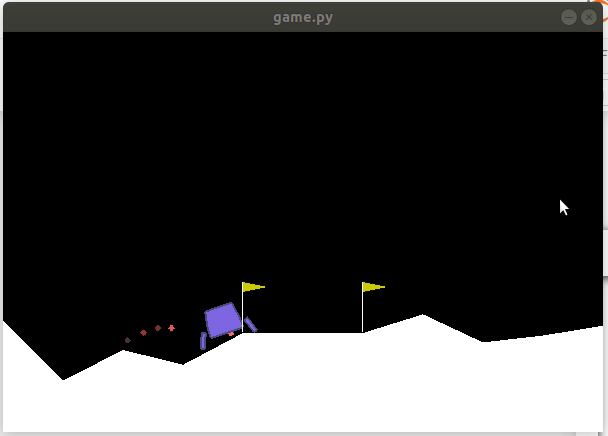

And here are the scores and average score plotted over the course of its training.

Text(0.5, 0, 'Episode #')

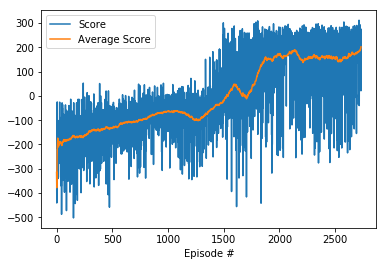

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

history = pd.read_csv('LunarLander-v2_test_final/LunarLander-v2_test_history.csv')
plt.plot(history['score'], label='Score')
plt.plot(history['average_score'], label='Average Score')
plt.legend(loc='upper left')
plt.xlabel('Episode #')

With more time I would've liked to readjust the other agents used above to use the new parameters (mainly a memory of size 100000) and see the results. Unfortunately, the training takes too long to run, but I encourage anyone reading this to try it out on their own with the lunar lander problem or any other Gym environment!